# Appendix

## Dataset

### Load

In [1]:
import pandas as pd
from IPython.display import display

Load data that we generated with the _Juqbox.jl_ pulse optimizer and different seeds. In this first set of experiments, we just do rotations on the x-axis of the Bloch (X-gate). Future works: different gates, different pulse optimizers, etc.

In [2]:
csv_files = [
    '../data/xrotate_seed1.csv',
    '../data/xrotate_seed2.csv',
    '../data/xrotate_seed3.csv',
    '../data/xrotate_seed4.csv',
    '../data/xrotate_seed5.csv',
    '../data/xrotate_seed6.csv',
]
df_list = []
for f in csv_files:
    df_list.append(pd.read_csv(f, header=None))

In [3]:
print('Data set shapes:')
for i in range(len(csv_files)):
    print(csv_files[i], df_list[i].shape)

Data set shapes:
../data/xrotate_seed1.csv (101, 21)
../data/xrotate_seed2.csv (101, 21)
../data/xrotate_seed3.csv (101, 21)
../data/xrotate_seed4.csv (101, 21)
../data/xrotate_seed5.csv (101, 21)
../data/xrotate_seed6.csv (101, 21)


Remove some data that has been proven being "difficult".

**NOTE: An ORDERING in the data sets is assumed. Different data sets may have different ORDERING**.

For this specific dataset, elements in position 0 are _β = -pi_ and elements in position 50 is _β = 0_.

In [4]:
for i in range(len(csv_files)):
    # Remove row for beta=-pi (same alpha as beta=+pi)
    df_list[i].drop(0, inplace=True)
    # Remove row for beta=0
    df_list[i].drop(50, inplace=True)

Concatenate the data sets.

In [5]:
df = pd.concat(df_list)

In [6]:
display(df.head())

0         1         2         3         4         5         6   \
1 -0.002227 -0.013359 -0.017554 -0.015438 -0.017162 -0.017211 -0.015443   
2 -0.003243 -0.014217 -0.016003 -0.015864 -0.015976 -0.015975 -0.015850   
3 -0.002533 -0.013236 -0.015930 -0.015621 -0.015832 -0.015857 -0.015657   
4 -0.003137 -0.013546 -0.015116 -0.015012 -0.015091 -0.015093 -0.015003   
5 -0.003040 -0.013286 -0.014874 -0.014792 -0.014853 -0.014853 -0.014784   

         7         8         9   ...        11        12        13        14  \
1 -0.017591 -0.013627 -0.001845  ...  0.000072  0.000049  0.000033  0.000031   
2 -0.016015 -0.014253 -0.003144  ...  0.000021  0.000005 -0.000008 -0.000011   
3 -0.015920 -0.013301 -0.002484  ... -0.000042 -0.000021  0.000003  0.000015   
4 -0.015126 -0.013592 -0.003011  ...  0.000029  0.000011 -0.000001 -0.000003   
5 -0.014882 -0.013323 -0.002937  ...  0.000026  0.000010 -0.000001 -0.000003   

         15        16        17            18        19        20  
1 -0.000007  0.000022  0.000083  1.993576e-05  0.000100 -3.078761  
2 -0.000030 -0.000011  0.000028  1.926120e-06  0.000052 -3.015929  
3  0.000036  0.000008 -0.000044 -2.058282e-05 -0.000058 -2.953097  
4 -0.000029 -0.000007  0.000039  2.099520e-08  0.000067 -2.890265  
5 -0.000029 -0.000008  0.000036 -3.342383e-06  0.000065 -2.827433  

[5 rows x 21 columns]

In [7]:
print('Data set shape', df.shape)
print('- Entries #', df.shape[0])
print('- Alpha   #', df.shape[1]-1)
print('- Beta    #', 1)

Data set shape (594, 21)
- Entries # 594
- Alpha   # 20
- Beta    # 1


### Split

In [8]:
import tensorflow as tf
print('Tensorflow ver.', tf.__version__)

Tensorflow ver. 2.4.0


In [9]:
from sklearn.model_selection import train_test_split

Dataset split is 60%-20%-20% training-validation-test set. We use a constant state (seed) for reproducible splits across multiple runs. 

In [10]:
x_train, x_test, Y_train, Y_test = train_test_split(df.iloc[:,20], df.iloc[:,:20], test_size=0.2, random_state=1)
x_train, x_val, Y_train, Y_val = train_test_split(x_train, Y_train, test_size=0.25, random_state=1)

In [11]:
print('Train set shape: ', Y_train.shape)
print('Validation set shape: ', Y_val.shape)
print('Test set shape:  ', Y_test.shape)

Train set shape:  (356, 20)
Validation set shape:  (119, 20)
Test set shape:   (119, 20)


In [12]:
display(Y_train.head())

0         1         2         3         4         5         6   \
36 -0.000788 -0.004067 -0.004875 -0.004902 -0.004924 -0.004893 -0.004821   
97  0.003334  0.014041  0.015600  0.015443  0.015567  0.015572  0.015432   
42 -0.000288 -0.002251 -0.002752 -0.002655 -0.002604 -0.002647 -0.002676   
58  0.000396  0.002140  0.002497  0.002619  0.002594  0.002620  0.002557   
66  0.000843  0.004494  0.005376  0.005263  0.005302  0.005337  0.005330   

          7         8         9         10            11            12  \
36 -0.004920 -0.004079 -0.000679  0.000056  1.241023e-05 -1.712737e-05   
97  0.015615  0.014099  0.003223  0.000049  1.911692e-05 -7.236112e-07   
42 -0.002682 -0.002215 -0.000272  0.000013 -9.075816e-07 -1.435957e-05   
58  0.002574  0.002238  0.000500  0.000057  6.212146e-05 -9.048177e-05   
66  0.005348  0.004565  0.000867  0.000060  3.312929e-05  8.369026e-06   

          13        14        15        16        17        18        19  
36 -0.000031 -0.000030 -0.000088 -0.000053  0.000023 -0.000061  0.000122  
97  0.000021 -0.000027 -0.000014  0.000003  0.000004  0.000023  0.000051  
42 -0.000058  0.000021  0.000048  0.000013 -0.000084  0.000062  0.000103  
58  0.000032  0.000014  0.000031 -0.000048 -0.000078  0.000003  0.000120  
66 -0.000005 -0.000004 -0.000061 -0.000026  0.000050 -0.000039  0.000127

### Save

Always good to save the split data set for future reference.

In [13]:
import numpy as np
np.save('../data/appendix/x_train.npy', x_train)
np.save('../data/appendix/x_val.npy', x_val)
np.save('../data/appendix/x_test.npy', x_test)
np.save('../data/appendix/Y_train.npy', Y_train)
np.save('../data/appendix/Y_val.npy', Y_val)
np.save('../data/appendix/Y_test.npy', Y_test)

### Visualize

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

It is interesting to notice that the first ten pulses are on a wider range of values, while the second half of the pulses seem more limited.
- Is there an explanation?
- Can this be combined with reinforcement learning?
- Are all of the 20 pulses necessary? Can we have less pulses so a smaller model?

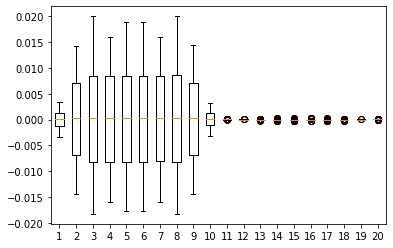

In [15]:
_ = plt.boxplot(df.iloc[:,:20], showfliers=True)

This is the second half.

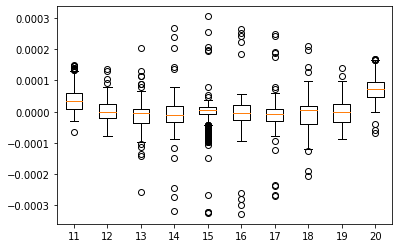

In [16]:
_ = plt.boxplot(df.iloc[:,10:20], showfliers=True, positions=np.arange(11,21,1))

This is the first entry in the dataset. Notice the difference between the first and second half of the pulses.

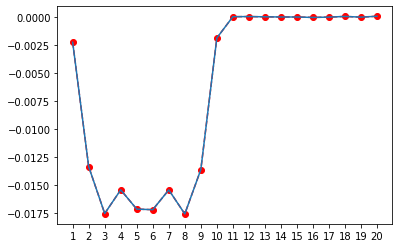

In [17]:
x = np.arange(1, 21, 1)
y = df.iloc[0:1,:20].to_numpy()[0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.show()

This is the second half of the (above) first entry in the dataset. The values are closer to zero than the first half.

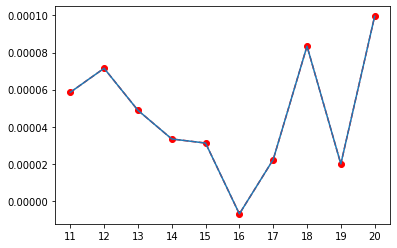

In [18]:
x = np.arange(11, 21, 1)
y = df.iloc[0:1,10:20].to_numpy()[0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.show()

Plot all of the entries in the dataset. Once again, only the first 10 elements (features) are significantly greater than zero.

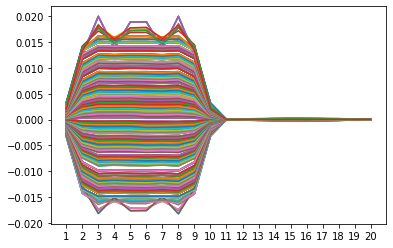

In [19]:
x = np.arange(1, 21, 1)
for i in range(df.shape[0]):
    y = df.iloc[i:i+1,:20].to_numpy()[0]
    plt.xticks(x, x)
    plt.plot(x, y)
plt.show()

Plot only the second half for all of the entries in the dataset.

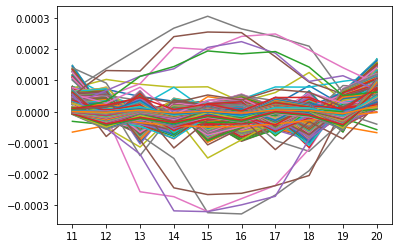

In [20]:
x = np.arange(11, 21, 1)
for i in range(df.shape[0]):
    y = df.iloc[i:i+1,10:20].to_numpy()[0]
    plt.xticks(x, x)
    plt.plot(x, y)
plt.show()

### Feature selection

Select the first 10 features (columns) in the dataset.

In [21]:
x_fs_train, x_fs_test, Y_fs_train, Y_fs_test = train_test_split(df.iloc[:,20], df.iloc[:,:10], test_size=0.2, random_state=1)
x_fs_train, x_fs_val, Y_fs_train, Y_fs_val = train_test_split(x_fs_train, Y_fs_train, test_size=0.25, random_state=1)

In [22]:
print('Train set (feature selection) shape: ', Y_fs_train.shape)
print('Validation set (feature selection) shape: ', Y_fs_val.shape)
print('Test set (feature selection) shape:  ', Y_fs_test.shape)

Train set (feature selection) shape:  (356, 10)
Validation set (feature selection) shape:  (119, 10)
Test set (feature selection) shape:   (119, 10)


In [23]:
import numpy as np
np.save('../data/appendix/x_fs_train.npy', x_fs_train)
np.save('../data/appendix/x_fs_val.npy', x_fs_val)
np.save('../data/appendix/x_fs_test.npy', x_fs_test)
np.save('../data/appendix/Y_fs_train.npy', Y_fs_train)
np.save('../data/appendix/Y_fs_val.npy', Y_fs_val)
np.save('../data/appendix/Y_fs_test.npy', Y_fs_test)

## ML Models

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import os

# Disable some console warnings
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

### α[20] ⇒ β 

In [25]:
prefix = '../model/appendix/reverse_problem/'

#### Keras

##### Create model

Classical multi-layer perceptron: 20 (inputs)- 20 - 12 - 8 - 4 - 1 (output)

In [26]:
model = Sequential()
model.add(Dense(20, input_shape=(20,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(12, name='fc2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(8, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(4, name='fc4', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu4'))
model.add(Dense(1, name='fc5', kernel_initializer='lecun_uniform'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 20)                420       
_________________________________________________________________
relu1 (Activation)           (None, 20)                0         
_________________________________________________________________
fc2 (Dense)                  (None, 12)                252       
_________________________________________________________________
relu2 (Activation)           (None, 12)                0         
_________________________________________________________________
fc3 (Dense)                  (None, 8)                 104       
_________________________________________________________________
relu3 (Activation)           (None, 8)                 0         
_________________________________________________________________
fc4 (Dense)                  (None, 4)                 3

In [28]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          20
               Dense   XXXXX -------------------       420    51.4%
                relu   #####          20
               Dense   XXXXX -------------------       252    30.8%
                relu   #####          12
               Dense   XXXXX -------------------       104    12.7%
                relu   #####           8
               Dense   XXXXX -------------------        36     4.4%
                relu   #####           4
               Dense   XXXXX -------------------         5     0.6%
                       #####           1


##### Training

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [30]:
best_model_file = prefix + '/best_keras_model.h5'
last_model_file = prefix + '/last_keras_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [31]:
train_and_save = False
history = None
if train_and_save:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = model.fit(Y_train,
                        x_train,
                        epochs=5000,
                        validation_data=(Y_val, x_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    model.save(last_model_file)

Load the saved best model and use it from now on.

In [32]:
model = load_model(best_model_file)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

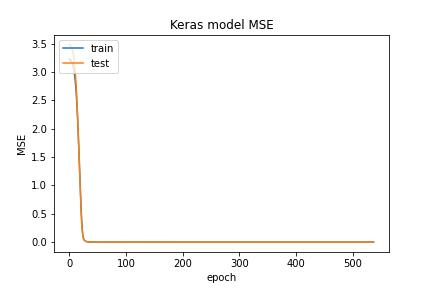

In [33]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='Keras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [34]:
mse, msle, mape = model.evaluate(Y_test, x_test)

4/4 [==============================] - 0s 1ms/step - loss: 6.8486e-04 - mean_squared_logarithmic_error: 6.1990e-05 - mean_absolute_percentage_error: 1.5279


In [35]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", mse, msle, mape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE           MSLE           MAPE
0  Keras 0.000684860104 0.000061990235 1.527859330177

Save metrics values to file for future reference.

In [36]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [37]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'Keras', mse, msle, mape)

In [38]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE           MAPE
0  06/08/2022 13:01:47     Keras 0.000684860104 0.000061990235 1.527859330177
1  06/08/2022 13:15:35    QKeras 0.000814924366 0.000079854057 2.509154796600
2  06/08/2022 13:19:30    QKeras 0.000745757425 0.000085921864 2.853749513626
3  06/08/2022 13:20:35    QKeras 0.000781160721 0.000092938601 2.925045251846
4  06/08/2022 13:23:06    QKeras 0.000815091189 0.000081226935 2.679524183273
5  06/08/2022 13:26:47    QKeras 0.000697448966 0.000066922832 1.869859218597
6  06/08/2022 13:27:46    QKeras 0.000836325926 0.000066094231 1.725353717804
7  06/08/2022 13:28:59    QKeras 0.000731052540 0.000061743347 1.547392487526
8  06/08/2022 14:02:43    hls4ml 0.004526870622            NaN            NaN
9  06/08/2022 14:04:54    hls4ml 0.004526870622            NaN            NaN

#### QAT/QKeras

##### Create model

As before, a classical multi-layer perceptron: 20 (inputs)- 20 - 12 - 8 - 4 - 1 (outputs).

In [39]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

Remember that `ap_fixed<16, 8, true>` is `quantized_bits(bits=16,integer=7)`.

In [40]:
# Build quantized model
qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(20,
                  input_shape=(20,),
                  name='fc1',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu1'))
qmodel.add(QDense(12,
                  name='fc2',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu2'))
qmodel.add(QDense(8,
                  name='fc3',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu3'))
qmodel.add(QDense(4,
                  name='fc4',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu4'))
qmodel.add(QDense(1,
                  name='fc5',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))

In [41]:
qmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (QDense)                 (None, 20)                420       
_________________________________________________________________
relu1 (QActivation)          (None, 20)                0         
_________________________________________________________________
fc2 (QDense)                 (None, 12)                252       
_________________________________________________________________
relu2 (QActivation)          (None, 12)                0         
_________________________________________________________________
fc3 (QDense)                 (None, 8)                 104       
_________________________________________________________________
relu3 (QActivation)          (None, 8)                 0         
_________________________________________________________________
fc4 (QDense)                 (None, 4)                

##### Training

In [42]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [43]:
best_model_file = prefix + '/best_qkeras_model.h5'
last_model_file = prefix + '/last_qkeras_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [44]:
train_and_save = False
history = None
if train_and_save:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.1),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = qmodel.fit(Y_train,
                        x_train,
                        epochs=5000,
                        validation_data=(Y_val, x_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    qmodel.save(last_model_file)

Load the saved best model and use it from now on.

In [45]:
co = {}
qkeras.utils._add_supported_quantized_objects(co)
qmodel = tf.keras.models.load_model(best_model_file, custom_objects=co)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

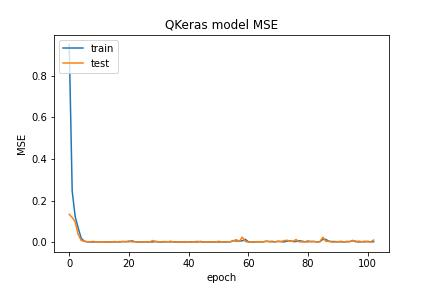

In [46]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='QKeras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [47]:
qmse, qmsle, qmape = qmodel.evaluate(Y_test, x_test)

4/4 [==============================] - 0s 1ms/step - loss: 7.3105e-04 - mean_squared_logarithmic_error: 6.1743e-05 - mean_absolute_percentage_error: 1.5474


In [48]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["QKeras", qmse, qmsle, qmape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE           MSLE           MAPE
0  QKeras 0.000731052540 0.000061743347 1.547392487526

Save metrics values to file for future reference.

In [49]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [50]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'QKeras', qmse, qmsle, qmape)

In [51]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE           MAPE
0  06/08/2022 13:01:47     Keras 0.000684860104 0.000061990235 1.527859330177
1  06/08/2022 13:15:35    QKeras 0.000814924366 0.000079854057 2.509154796600
2  06/08/2022 13:19:30    QKeras 0.000745757425 0.000085921864 2.853749513626
3  06/08/2022 13:20:35    QKeras 0.000781160721 0.000092938601 2.925045251846
4  06/08/2022 13:23:06    QKeras 0.000815091189 0.000081226935 2.679524183273
5  06/08/2022 13:26:47    QKeras 0.000697448966 0.000066922832 1.869859218597
6  06/08/2022 13:27:46    QKeras 0.000836325926 0.000066094231 1.725353717804
7  06/08/2022 13:28:59    QKeras 0.000731052540 0.000061743347 1.547392487526
8  06/08/2022 14:02:43    hls4ml 0.004526870622            NaN            NaN
9  06/08/2022 14:04:54    hls4ml 0.004526870622            NaN            NaN

#### hls4ml

##### Convert model

In [52]:
import hls4ml

/home/giuseppe/research/projects/quantum/hls4ml/hls4ml/converters/__init__.py:15: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [53]:
print('hls4ml ver.', hls4ml.__version__)

hls4ml ver. 0.5.1


In [54]:
hconfig = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: Input
Layer name: fc1, layer type: QDense
  -> Activation (linear), layer name: fc1
Layer name: relu1, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu1
Layer name: fc2, layer type: QDense
  -> Activation (linear), layer name: fc2
Layer name: relu2, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu2
Layer name: fc3, layer type: QDense
  -> Activation (linear), layer name: fc3
Layer name: relu3, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu3
Layer name: fc4, layer type: QDense
  -> Activation (linear), layer name: fc4
Layer name: relu4, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu4
Layer name: fc5, layer type: QDense
  -> Activation (linear), layer name: fc5


Show hls4ml configuration.

In [55]:
import plotting
plotting.print_dict(hconfig)

Model
  Precision:         ap_fixed<16,6>
  ReuseFactor:       1
  Strategy:          Latency
LayerName
  fc1_input
    Precision
      result:        ap_fixed<16,6>
  fc1
    Precision
      weight:        ap_fixed<16,8>
      bias:          ap_fixed<16,8>
    ReuseFactor:     1
  fc1_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  relu1
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  relu1_quantized_relu
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  fc2
    Precision
      weight:        ap_fixed<16,8>
      bias:          ap_fixed<16,8>
    ReuseFactor:     1
  fc2_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  relu2
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  relu2_quantized_relu
    Precision
      result:        ap_ufixed<16,7>
 

In [56]:
hmodel = hls4ml.converters.convert_from_keras_model(qmodel,
                                                    hls_config=hconfig,
                                                    output_dir=prefix+'hls4ml_prj',
                                                    part='XC7A100T')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc1, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: relu1, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc2, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 12]
Layer name: relu2, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc3, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 8]
Layer name: relu3, layer type: Activation, input shapes: [[None, 8]], output shape: [None, 8]
Layer name: fc4, layer type: QDense, input shapes: [[None, 8]], output shape: [None, 4]
Layer name: relu4, layer type: Activation, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc5, layer type: QDense, input shapes: [[None, 4]], output shape: [None, 1]
Creating HLS model


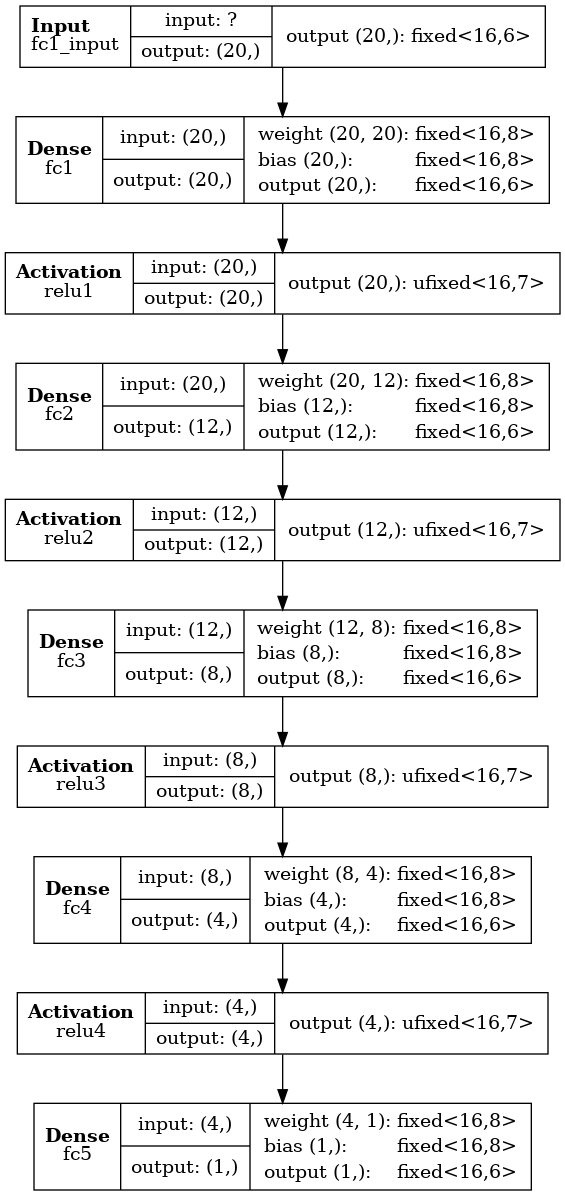

In [57]:
hls4ml.utils.plot_model(hmodel, show_shapes=True, show_precision=True, to_file=None)

In [58]:
hmodel.compile()

Writing HLS project
Done


##### Evaluation

In [59]:
import numpy as np

def hls4ml_evaluate_local(a, b):
    accum = 0
    accum = (a-b)**2
    return accum

def hls4ml_evaluate(model, x_test, Y_test):
    assert(len(x_test)==len(Y_test))
    N=len(x_test)
    accum = 0
    for i in range(N):
        expected = Y_test[i:i+1].to_numpy()[0]
        predicted = model.predict(np.ascontiguousarray(x_test.to_numpy()[i]))[0]
        accum += hls4ml_evaluate_local(expected, predicted)
    return accum / len(x_test)

In [60]:
hmse = hls4ml_evaluate(hmodel, Y_test, x_test)

In [61]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["hls4ml", hmse, "", ""]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE MSLE MAPE
0  hls4ml 0.004526870622

Save metrics values to file for future reference.

In [62]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [63]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'hls4ml', hmse, "", "")

In [64]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE           MAPE
0  06/08/2022 13:01:47     Keras 0.000684860104 0.000061990235 1.527859330177
1  06/08/2022 13:15:35    QKeras 0.000814924366 0.000079854057 2.509154796600
2  06/08/2022 13:19:30    QKeras 0.000745757425 0.000085921864 2.853749513626
3  06/08/2022 13:20:35    QKeras 0.000781160721 0.000092938601 2.925045251846
4  06/08/2022 13:23:06    QKeras 0.000815091189 0.000081226935 2.679524183273
5  06/08/2022 13:26:47    QKeras 0.000697448966 0.000066922832 1.869859218597
6  06/08/2022 13:27:46    QKeras 0.000836325926 0.000066094231 1.725353717804
7  06/08/2022 13:28:59    QKeras 0.000731052540 0.000061743347 1.547392487526
8  06/08/2022 14:02:43    hls4ml 0.004526870622            NaN            NaN
9  06/08/2022 14:04:54    hls4ml 0.004526870622            NaN            NaN

#### Comparison

In [65]:
x_keras = model.predict(Y_test)
x_qkeras = qmodel.predict(Y_test)
x_hls4ml = hmodel.predict(np.ascontiguousarray(np.array(Y_test.to_numpy())))

Plot and compare the Keras, QKeras, and hls4ml predictions with the reference in the dataset.

In [66]:
for i in range(len(x_test)):
    print(x_test.to_numpy().reshape(len(x_test),1)[i][0], " / ", x_keras[i][0], " / ", x_qkeras[i][0], " / ", x_hls4ml[i][0])

1.005309649148734  /  0.9956176  /  0.99642944  /  0.9619140625
0.1256637061435917  /  0.124389745  /  0.123703  /  0.03125
-3.078760800517997  /  -3.0721996  /  -3.03125  /  -3.03125
-2.827433388230814  /  -2.8120801  /  -2.809784  /  -2.8662109375
-1.5079644737231006  /  -1.4668373  /  -1.4622192  /  -1.505859375
1.5707963267948966  /  1.5244371  /  1.523819  /  1.5341796875
-0.1256637061435917  /  -0.12844068  /  -0.12779236  /  -0.1474609375
-0.3141592653589793  /  -0.3258757  /  -0.32485962  /  -0.3388671875
-0.1256637061435917  /  -0.12692186  /  -0.1240387  /  -0.0908203125
-3.078760800517997  /  -3.0730205  /  -3.03125  /  -3.03125
-0.4398229715025711  /  -0.44366586  /  -0.4393463  /  -0.4716796875
1.382300767579509  /  1.3712444  /  1.3755493  /  1.373046875
1.884955592153876  /  1.8482174  /  1.8485107  /  1.8251953125
-1.6336281798666925  /  -1.5827416  /  -1.5842133  /  -1.599609375
1.6964600329384885  /  1.6478983  /  1.6495667  /  1.66015625
1.2566370614359172  /  1.2304

In [67]:
print('Expected number of plots (test set size):', Y_test.shape[0])

Expected number of plots (test set size): 119


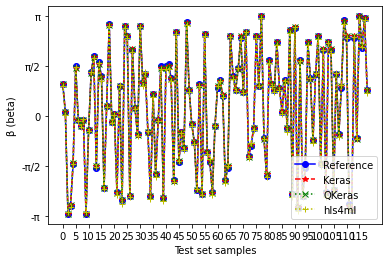

In [68]:
x_axis = np.arange(0, len(x_test), 1)
plt.clf()
plt.plot(x_axis, x_test.to_numpy(), marker='o', linestyle='-', color='b') 
plt.plot(x_axis, x_keras, marker='*', linestyle='--', color='r')
plt.plot(x_axis, x_keras, marker='x', linestyle=':', color='g')
plt.plot(x_axis, x_hls4ml, marker='+', linestyle=':', color='y')
plt.xticks(np.arange(0, len(x_test), 5), np.arange(0, len(x_test), 5))
pi = np.pi
y_axis = np.arange(-pi, pi + pi/2, step=(pi / 2))
plt.yticks(y_axis, ['-π', '-π/2', '0', 'π/2', 'π'])
plt.legend(['Reference', 'Keras', 'QKeras', 'hls4ml'], loc='lower right')
plt.xlabel('Test set samples')
plt.ylabel('β (beta)')
#plt.rcParams["figure.figsize"] = (20,5)
plt.show()

### β ⇒ α[20]

In [69]:
prefix = '../model/appendix/forward_problem/'

#### Keras

##### Create model

Classical multi-layer perceptron: 1 (inputs)- 4 - 8 - 12 - 12 - 12 - 12 - 12 - 20 (outputs)

In [70]:
model = Sequential()
model.add(Dense(4, input_shape=(1,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(8, name='fc2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2e'))
model.add(Dense(12, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(12, name='fc4', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e'))
model.add(Dense(12, name='fc5', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e2'))
model.add(Dense(12, name='fc6', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e4'))
model.add(Dense(12, name='fc7', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e3'))
model.add(Dense(20, name='fc8', kernel_initializer='lecun_uniform'))

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 4)                 8         
_________________________________________________________________
relu1 (Activation)           (None, 4)                 0         
_________________________________________________________________
fc2 (Dense)                  (None, 8)                 40        
_________________________________________________________________
relu2e (Activation)          (None, 8)                 0         
_________________________________________________________________
fc3 (Dense)                  (None, 12)                108       
_________________________________________________________________
relu3 (Activation)           (None, 12)                0         
_________________________________________________________________
fc4 (Dense)                  (None, 12)               

In [72]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           1
               Dense   XXXXX -------------------         8     0.8%
                relu   #####           4
               Dense   XXXXX -------------------        40     3.8%
                relu   #####           8
               Dense   XXXXX -------------------       108    10.4%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       260    25.0%
                       #####          20


##### Training

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [74]:
best_model_file = prefix + '/best_keras_model.h5'
last_model_file = prefix + '/last_keras_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [75]:
train_and_save = False
history = None
if train_and_save:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = model.fit(x_train,
                        Y_train,
                        epochs=5000,
                        validation_data=(x_val, Y_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    model.save(last_model_file)

Load the saved best model and use it from now on.

In [76]:
model = load_model(best_model_file)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

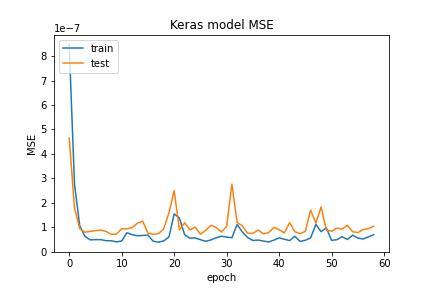

In [77]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='Keras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [78]:
mse, msle, mape = model.evaluate(x_test, Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 7.5874e-08 - mean_squared_logarithmic_error: 5.8897e-08 - mean_absolute_percentage_error: 380.2802


In [79]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", mse, msle, mape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE           MSLE             MAPE
0  Keras 0.000000075874 0.000000058897 380.280212402344

Save metrics values to file for future reference.

In [80]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [81]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'Keras', mse, msle, mape)

In [82]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE  \
0    06/08/2022 14:22:06     Keras 0.000004622761 0.000004457066   
1    06/08/2022 15:21:57    QKeras 0.000036568523 0.000019413175   
2    06/08/2022 16:32:20    QKeras 0.000036568523 0.000019413175   
3    06/08/2022 16:35:08    QKeras 0.000036568523 0.000019413175   
4    06/08/2022 17:01:17    hls4ml 0.748273813300            NaN   
..                   ...       ...            ...            ...   
133  07/08/2022 14:12:50    hls4ml 0.000000080430            NaN   
134  07/08/2022 18:01:43     Keras 0.000000075874 0.000000058897   
135  07/08/2022 18:01:45    QKeras 0.000000078758 0.000000063699   
136  07/08/2022 18:01:53    hls4ml 0.000000080430            NaN   
137  07/08/2022 18:47:53     Keras 0.000000075874 0.000000058897   

                 MAPE  
0   1799.312500000000  
1    329.365417480469  
2    329.365417480469  
3    329.365417480469  
4                 NaN  
..                ...  
133               NaN  
134  380.280212402344  
135   79.758392333984  
136               NaN  
137  380.280212402344  

[138 rows x 5 columns]

#### QAT/QKeras

##### Create model

As before, a classical multi-layer perceptron: 1 (inputs)- 4 - 8 - 12 - 12 - 12 - 12 - 20 (outputs).

In [83]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

Remember that `ap_fixed<16, 8, true>` is `quantized_bits(bits=16,integer=7)`.

In [84]:
# Build quantized model
W=18
I=4

qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(4,
                  input_shape=(1,),
                  name='fc1',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu1'))
qmodel.add(QDense(8,
                  name='fc2',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu2'))
qmodel.add(QDense(12,
                  name='fc3',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu3'))
qmodel.add(QDense(12,
                  name='fc4',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu4'))
qmodel.add(QDense(12,
                  name='fc5',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu5'))
qmodel.add(QDense(12,
                  name='fc6',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu6'))
qmodel.add(QDense(20,
                  name='fc7',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))

In [85]:
qmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (QDense)                 (None, 4)                 8         
_________________________________________________________________
relu1 (QActivation)          (None, 4)                 0         
_________________________________________________________________
fc2 (QDense)                 (None, 8)                 40        
_________________________________________________________________
relu2 (QActivation)          (None, 8)                 0         
_________________________________________________________________
fc3 (QDense)                 (None, 12)                108       
_________________________________________________________________
relu3 (QActivation)          (None, 12)                0         
_________________________________________________________________
fc4 (QDense)                 (None, 12)               

##### Training

In [86]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [87]:
best_model_file = prefix + '/best_qkeras_model.h5'
last_model_file = prefix + '/last_qkeras_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [88]:
train_and_save = False
history = None
if train_and_save:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.01),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = qmodel.fit(x_train,
                        Y_train,
                        epochs=5000,
                        validation_data=(x_val, Y_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    qmodel.save(last_model_file)

Load the saved best model and use it from now on.

In [89]:
co = {}
qkeras.utils._add_supported_quantized_objects(co)
qmodel = tf.keras.models.load_model(best_model_file, custom_objects=co)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

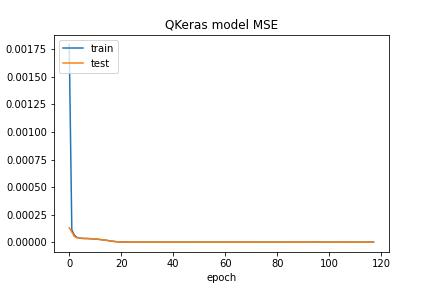

In [90]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='QKeras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [91]:
qmse, qmsle, qmape = qmodel.evaluate(x_test, Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 7.8758e-08 - mean_squared_logarithmic_error: 6.3699e-08 - mean_absolute_percentage_error: 79.7584


Save metrics values to file for future reference.

In [92]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [93]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["QKeras", qmse, qmsle, qmape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE           MSLE            MAPE
0  QKeras 0.000000078758 0.000000063699 79.758392333984

In [94]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'QKeras', qmse, qmsle, qmape)

In [95]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE  \
0    06/08/2022 14:22:06     Keras 0.000004622761 0.000004457066   
1    06/08/2022 15:21:57    QKeras 0.000036568523 0.000019413175   
2    06/08/2022 16:32:20    QKeras 0.000036568523 0.000019413175   
3    06/08/2022 16:35:08    QKeras 0.000036568523 0.000019413175   
4    06/08/2022 17:01:17    hls4ml 0.748273813300            NaN   
..                   ...       ...            ...            ...   
134  07/08/2022 18:01:43     Keras 0.000000075874 0.000000058897   
135  07/08/2022 18:01:45    QKeras 0.000000078758 0.000000063699   
136  07/08/2022 18:01:53    hls4ml 0.000000080430            NaN   
137  07/08/2022 18:47:53     Keras 0.000000075874 0.000000058897   
138  07/08/2022 18:47:54    QKeras 0.000000078758 0.000000063699   

                 MAPE  
0   1799.312500000000  
1    329.365417480469  
2    329.365417480469  
3    329.365417480469  
4                 NaN  
..                ...  
134  380.280212402344  
135   79.758392333984  
136               NaN  
137  380.280212402344  
138   79.758392333984  

[139 rows x 5 columns]

#### hls4ml

##### Convert model

In [96]:
import hls4ml

In [97]:
print('hls4ml ver.', hls4ml.__version__)

hls4ml ver. 0.5.1


In [98]:
hconfig = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')
hconfig['Model']['Precision'] = 'ap_fixed<64,16>'
hconfig['LayerName']['fc1_input']['Precision']['result'] = 'ap_fixed<32,6>'
hconfig['LayerName']['fc1']['Precision']['result'] = 'ap_fixed<23,4>'
hconfig['LayerName']['relu1']['Precision']['result'] = 'ap_ufixed<22,3>'
hconfig['LayerName']['fc2']['Precision']['result'] = 'ap_fixed<23,4>'
hconfig['LayerName']['relu2']['Precision']['result'] = 'ap_ufixed<14,4>'
hconfig['LayerName']['fc3']['Precision']['result'] = 'ap_fixed<16,4>'
hconfig['LayerName']['relu3']['Precision']['result'] = 'ap_ufixed<16,4>'
hconfig['LayerName']['fc4']['Precision']['result'] = 'ap_fixed<24,4>'
hconfig['LayerName']['relu4']['Precision']['result'] = 'ap_ufixed<24,4>'
hconfig['LayerName']['fc5']['Precision']['result'] = 'ap_fixed<28,4>'
hconfig['LayerName']['relu5']['Precision']['result'] = 'ap_ufixed<28,4>'
hconfig['LayerName']['fc6']['Precision']['result'] = 'ap_fixed<28,4>'
hconfig['LayerName']['relu6']['Precision']['result'] = 'ap_ufixed<28,4>'
hconfig['LayerName']['fc7']['Precision']['result'] = 'ap_fixed<32,2>'

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: Input
Layer name: fc1, layer type: QDense
  -> Activation (linear), layer name: fc1
Layer name: relu1, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu1
Layer name: fc2, layer type: QDense
  -> Activation (linear), layer name: fc2
Layer name: relu2, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu2
Layer name: fc3, layer type: QDense
  -> Activation (linear), layer name: fc3
Layer name: relu3, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu3
Layer name: fc4, layer type: QDense
  -> Activation (linear), layer name: fc4
Layer name: relu4, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu4
Layer name: fc5, layer type: QDense
  -> Activation (linear), layer name: fc5
Layer name: relu5, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu5
Layer name: fc6, layer type: QDense
  -> Activation (linear)

Show hls4ml configuration.

In [99]:
import plotting
plotting.print_dict(hconfig)

Model
  Precision:         ap_fixed<64,16>
  ReuseFactor:       1
  Strategy:          Latency
LayerName
  fc1_input
    Precision
      result:        ap_fixed<32,6>
  fc1
    Precision
      weight:        ap_fixed<18,4>
      bias:          ap_fixed<18,4>
      result:        ap_fixed<23,4>
    ReuseFactor:     1
  fc1_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  relu1
    Precision
      result:        ap_ufixed<22,3>
    ReuseFactor:     1
  relu1_quantized_relu
    Precision
      result:        ap_ufixed<18,3>
    ReuseFactor:     1
  fc2
    Precision
      weight:        ap_fixed<18,4>
      bias:          ap_fixed<18,4>
      result:        ap_fixed<23,4>
    ReuseFactor:     1
  fc2_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  relu2
    Precision
      result:        ap_ufixed<14,4>
    ReuseFactor:     1
  

In [100]:
hmodel = hls4ml.converters.convert_from_keras_model(qmodel,
                                                    hls_config=hconfig,
                                                    output_dir=prefix+'hls4ml_prj',
                                                    part='xczu3eg-sbva484-1-e')
                                                    #part='xc7a100t-csg324-3')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: fc1, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 4]
Layer name: relu1, layer type: Activation, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc2, layer type: QDense, input shapes: [[None, 4]], output shape: [None, 8]
Layer name: relu2, layer type: Activation, input shapes: [[None, 8]], output shape: [None, 8]
Layer name: fc3, layer type: QDense, input shapes: [[None, 8]], output shape: [None, 12]
Layer name: relu3, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc4, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: relu4, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc5, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: relu5, layer type: Activation, 

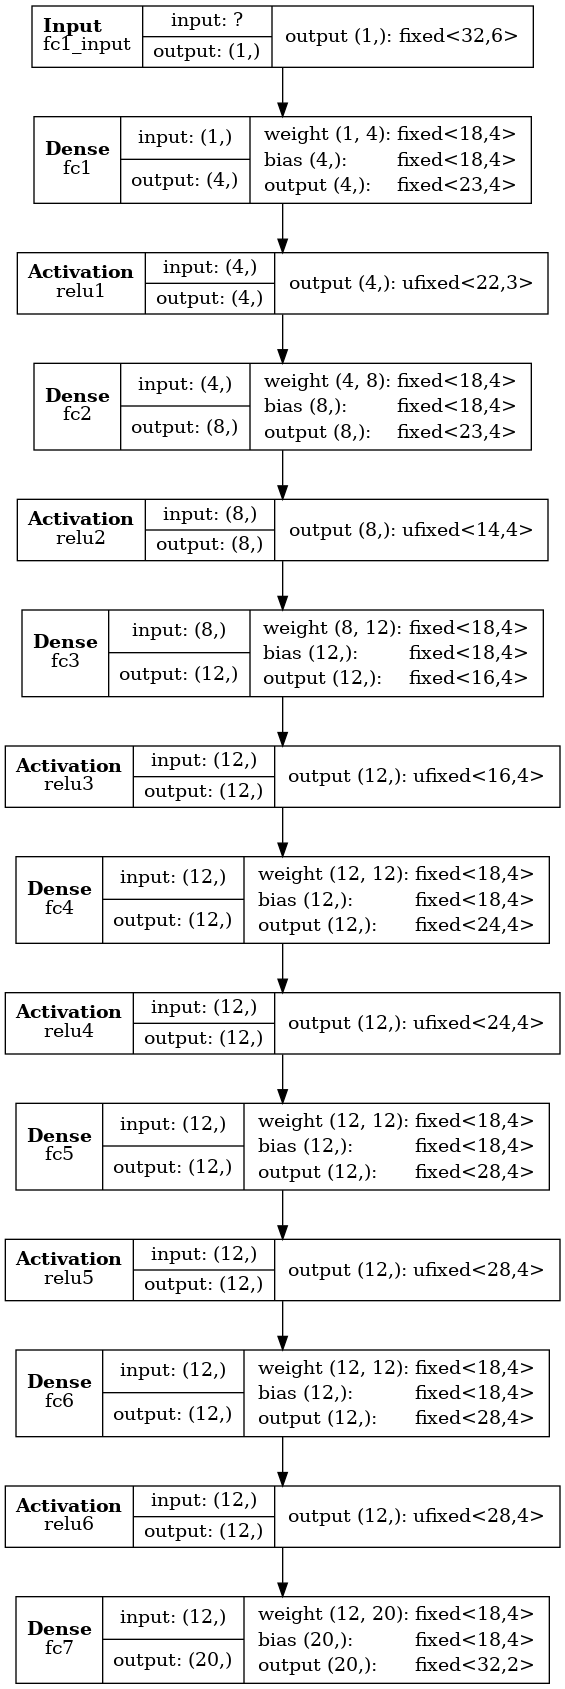

In [101]:
hls4ml.utils.plot_model(hmodel, show_shapes=True, show_precision=True, to_file=None)

In [102]:
hmodel.compile()

Writing HLS project
Done


##### Tracing and debugging

##### Evaluation

In [103]:
from metrics import hls4ml_evaluate

In [104]:
hmse = hls4ml_evaluate(hmodel, x_test, Y_test)

In [105]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["hls4ml", hmse, "", ""]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE MSLE MAPE
0  hls4ml 0.000000080430

Save metrics values to file for future reference.

In [106]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [107]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'hls4ml', hmse, "", "")

In [108]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE  \
0    06/08/2022 14:22:06     Keras 0.000004622761 0.000004457066   
1    06/08/2022 15:21:57    QKeras 0.000036568523 0.000019413175   
2    06/08/2022 16:32:20    QKeras 0.000036568523 0.000019413175   
3    06/08/2022 16:35:08    QKeras 0.000036568523 0.000019413175   
4    06/08/2022 17:01:17    hls4ml 0.748273813300            NaN   
..                   ...       ...            ...            ...   
135  07/08/2022 18:01:45    QKeras 0.000000078758 0.000000063699   
136  07/08/2022 18:01:53    hls4ml 0.000000080430            NaN   
137  07/08/2022 18:47:53     Keras 0.000000075874 0.000000058897   
138  07/08/2022 18:47:54    QKeras 0.000000078758 0.000000063699   
139  07/08/2022 18:48:01    hls4ml 0.000000080430            NaN   

                 MAPE  
0   1799.312500000000  
1    329.365417480469  
2    329.365417480469  
3    329.365417480469  
4                 NaN  
..                ...  
135   79.758392333984  
136               NaN  
137  380.280212402344  
138   79.758392333984  
139               NaN  

[140 rows x 5 columns]

#### Comparison

In [109]:
Y_keras = model.predict(x_test)
Y_qkeras = qmodel.predict(x_test)
Y_hls4ml = hmodel.predict(np.array(x_test.to_numpy()).reshape((len(x_test), 1)))

Plot and compare the Keras, QKeras, and hls4ml predictions with the reference in the dataset.

In [110]:
print('Expected number of plots (test set size):', Y_test.shape[0])

Expected number of plots (test set size): 119


Test # 0


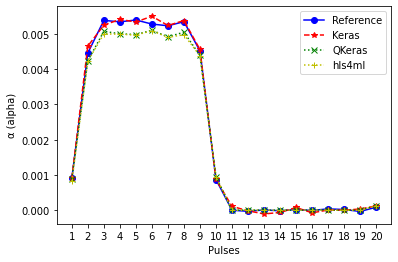

Test # 1


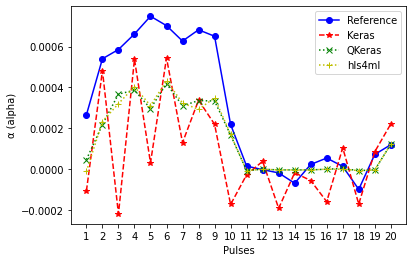

Test # 2


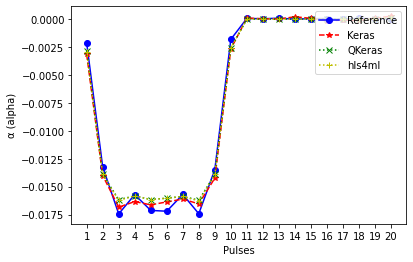

Test # 3


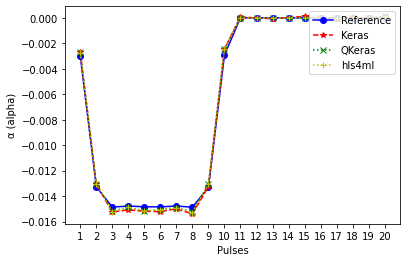

Test # 4


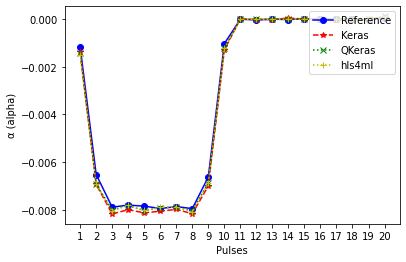

Test # 5


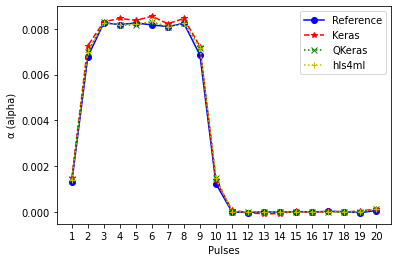

Test # 6


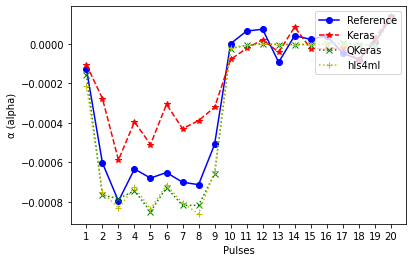

Test # 7


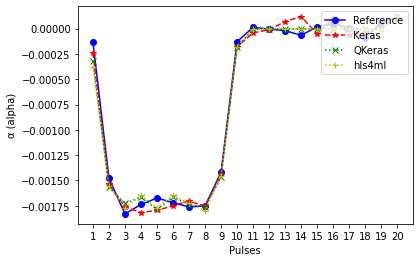

Test # 8


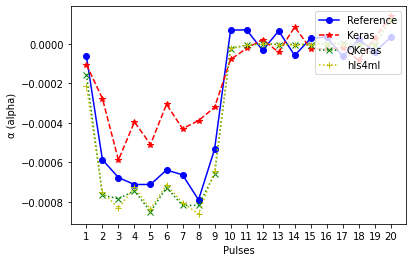

Test # 9


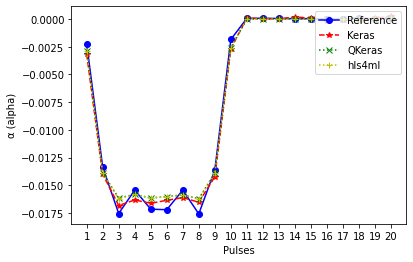

Test # 10


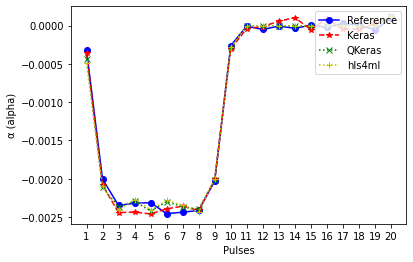

Test # 11


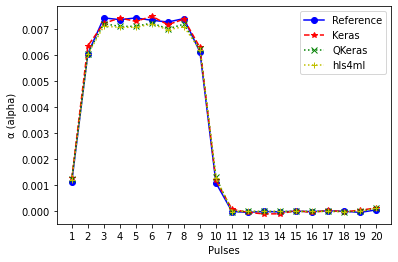

Test # 12


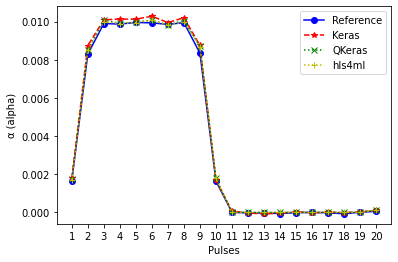

Test # 13


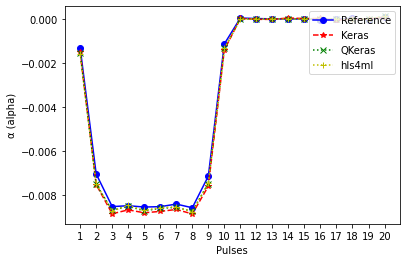

Test # 14


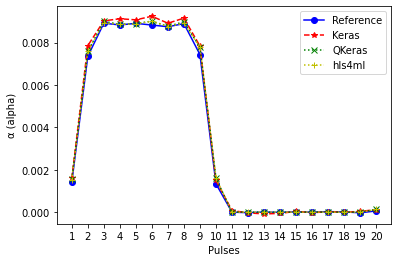

Test # 15


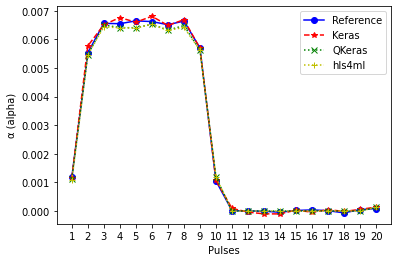

Test # 16


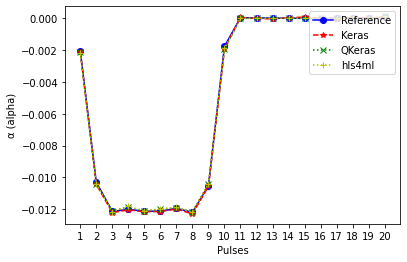

Test # 17


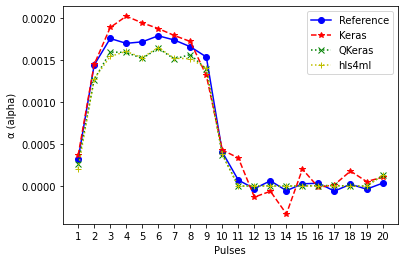

Test # 18


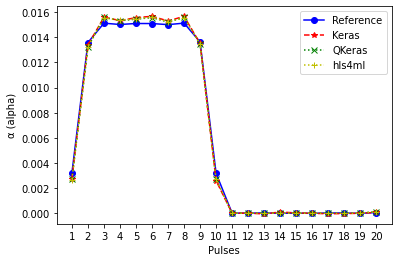

Test # 19


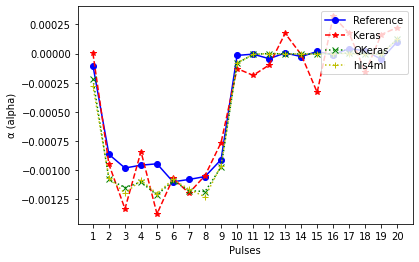

Test # 20


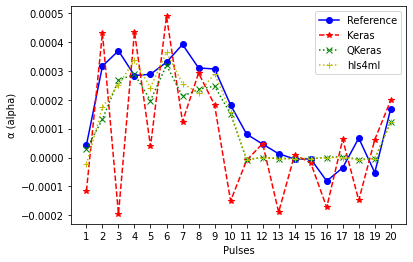

Test # 21


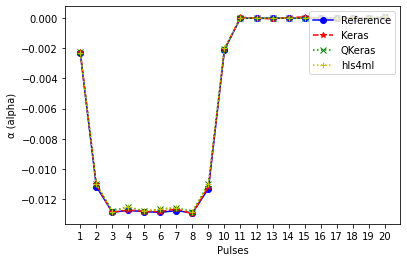

Test # 22


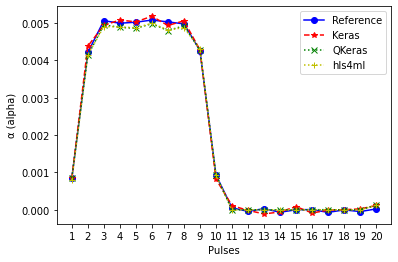

Test # 23


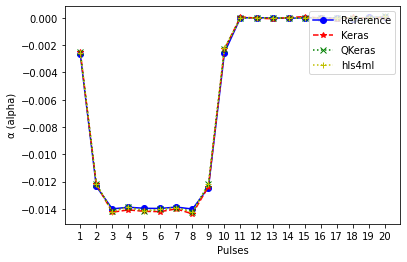

Test # 24


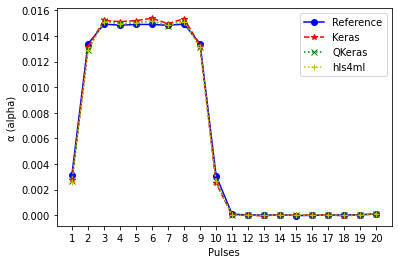

Test # 25


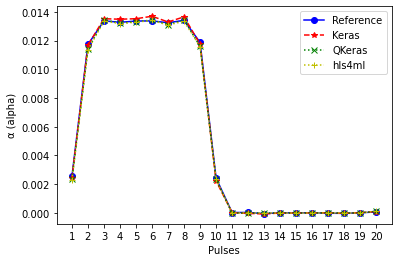

Test # 26


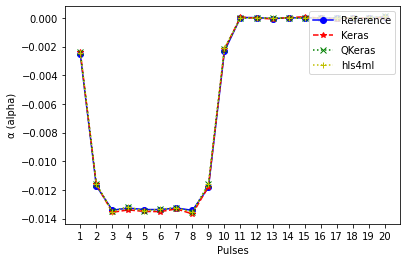

Test # 27


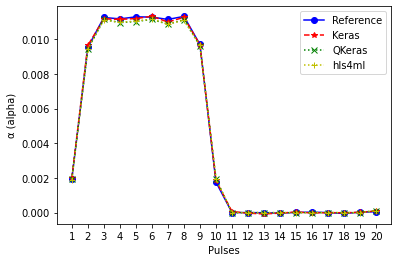

Test # 28


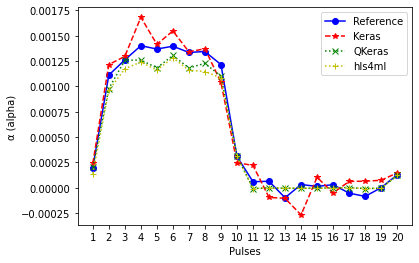

Test # 29


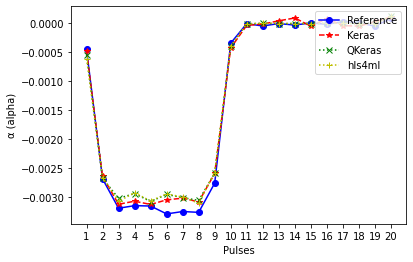

Test # 30


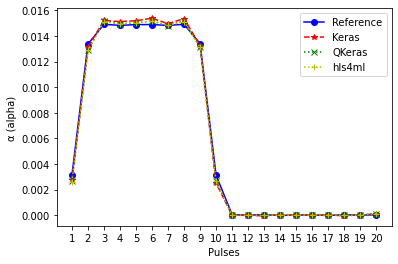

Test # 31


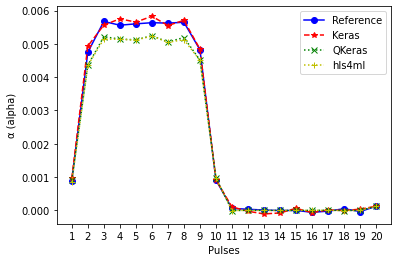

Test # 32


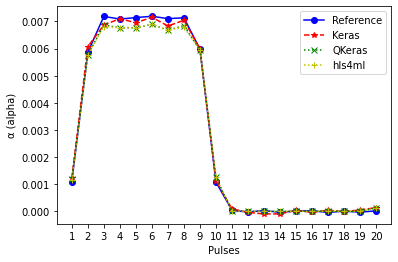

Test # 33


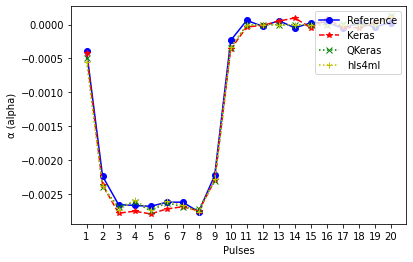

Test # 34


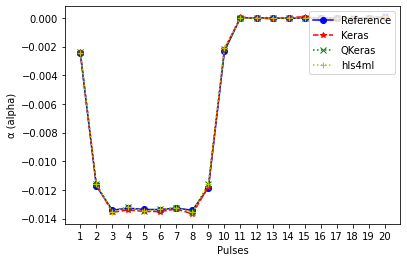

Test # 35


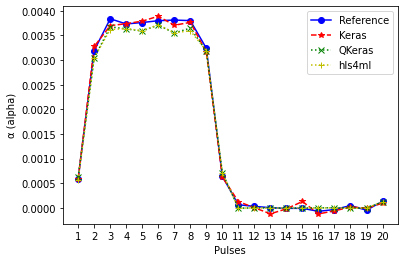

Test # 36


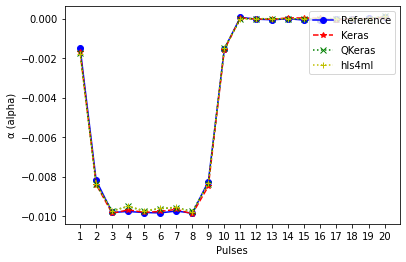

Test # 37


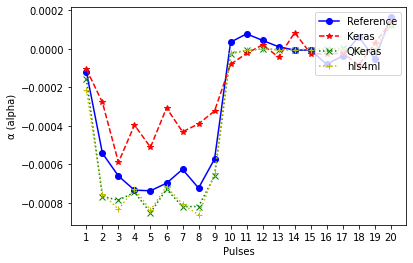

Test # 38


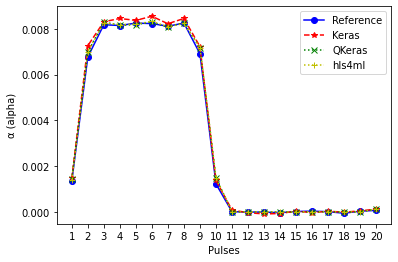

Test # 39


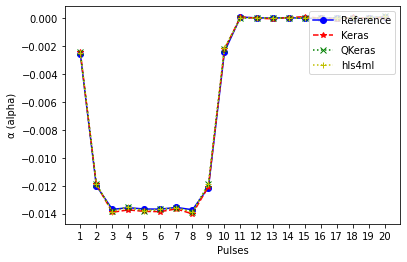

Test # 40


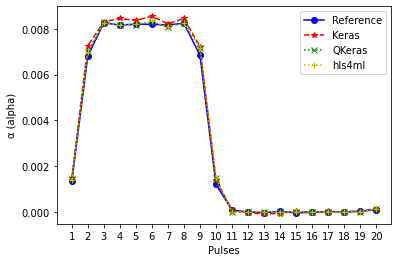

Test # 41


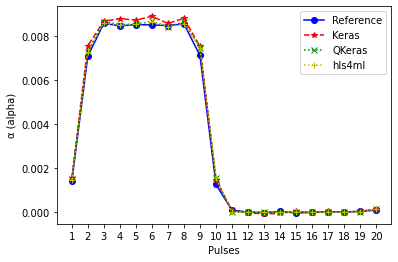

Test # 42


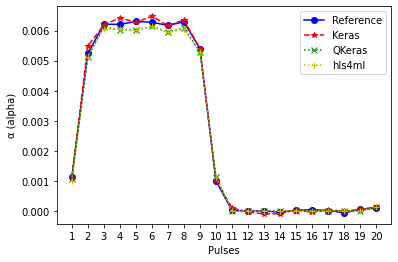

Test # 43


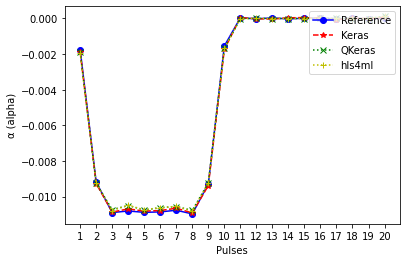

Test # 44


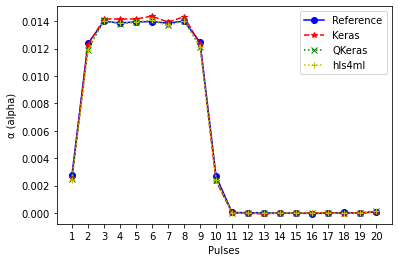

Test # 45


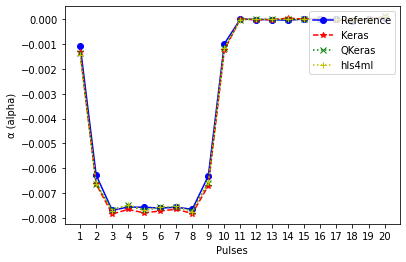

Test # 46


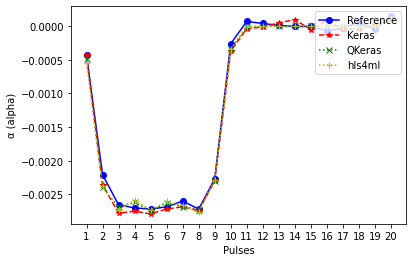

Test # 47


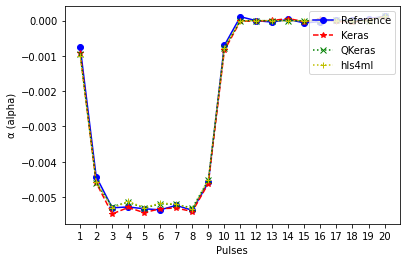

Test # 48


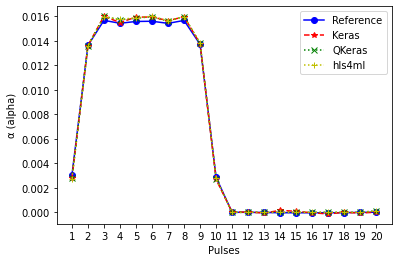

Test # 49


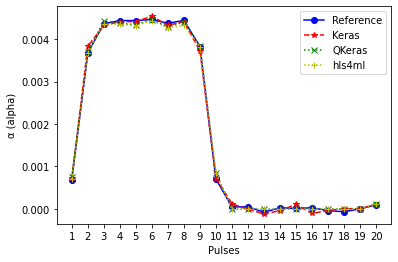

Test # 50


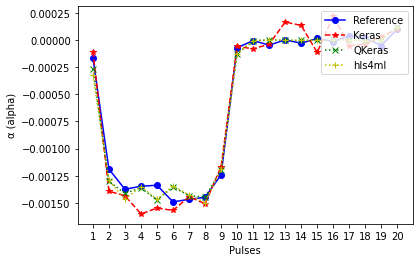

Test # 51


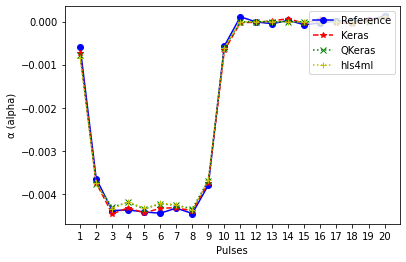

Test # 52


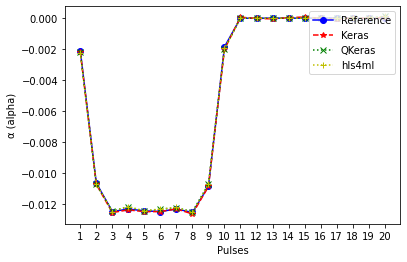

Test # 53


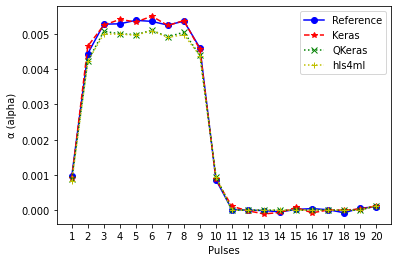

Test # 54


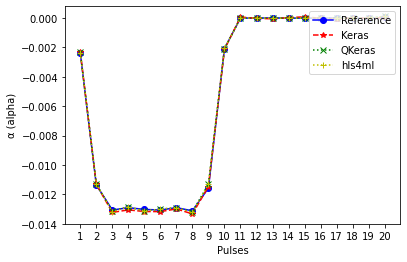

Test # 55


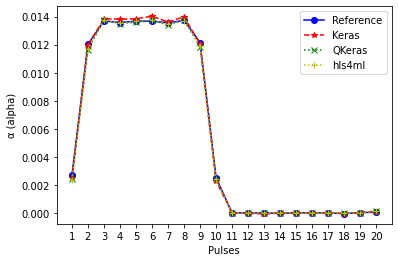

Test # 56


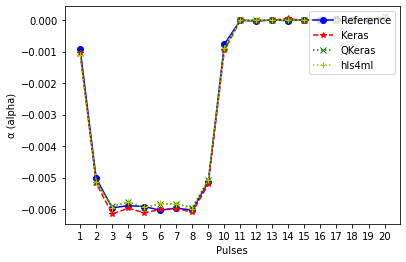

Test # 57


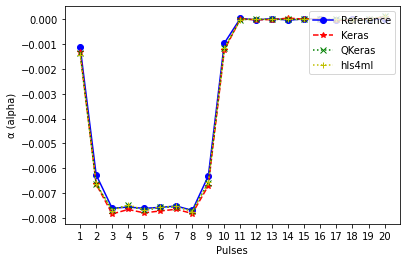

Test # 58


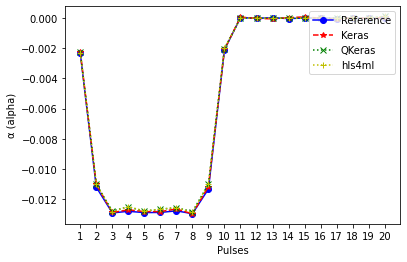

Test # 59


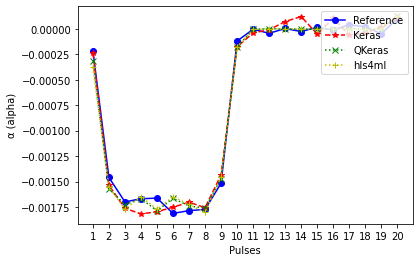

Test # 60


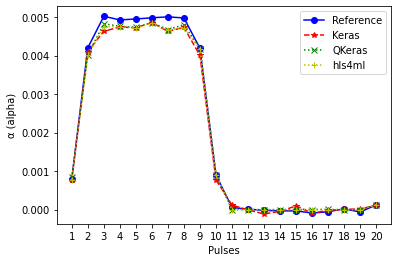

Test # 61


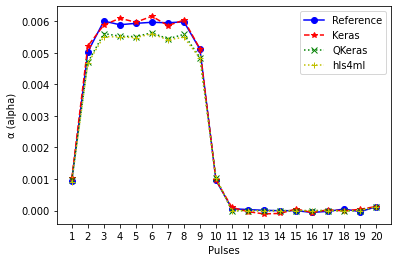

Test # 62


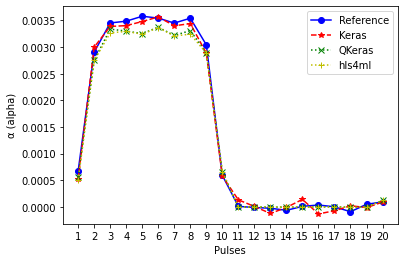

Test # 63


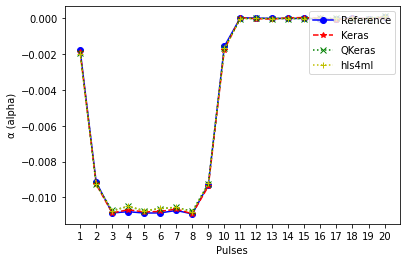

Test # 64


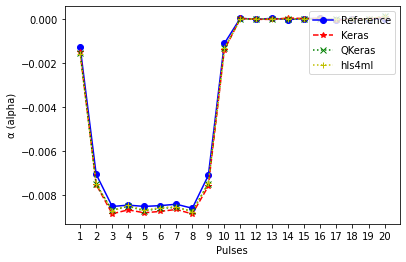

Test # 65


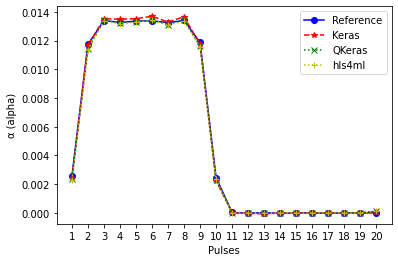

Test # 66


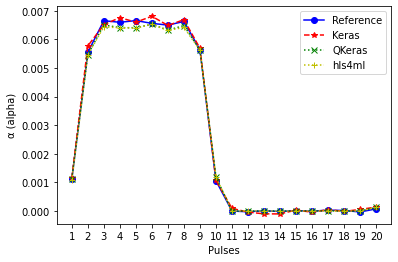

Test # 67


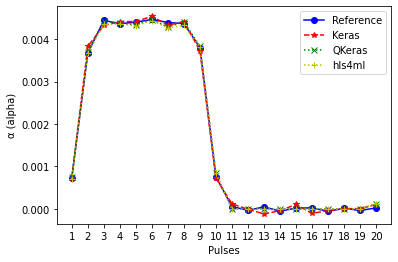

Test # 68


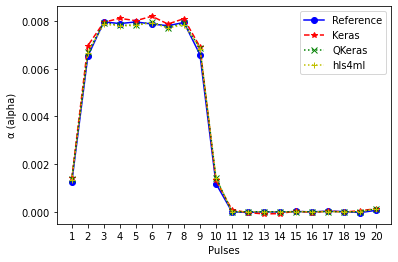

Test # 69


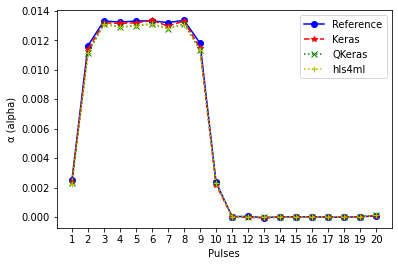

Test # 70


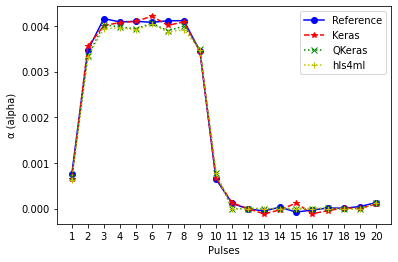

Test # 71


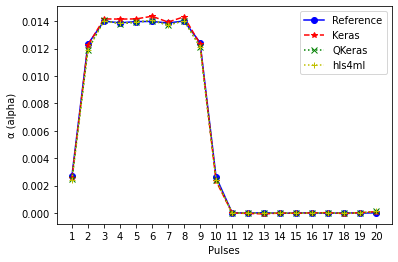

Test # 72


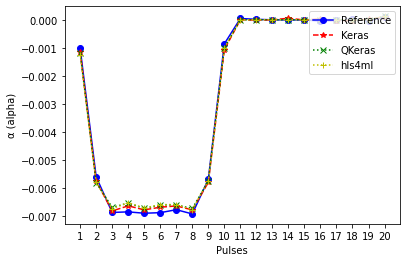

Test # 73


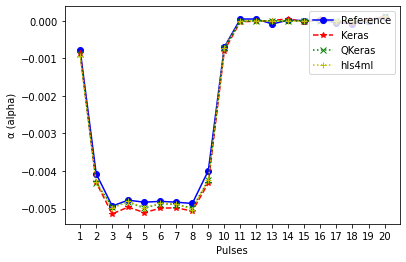

Test # 74


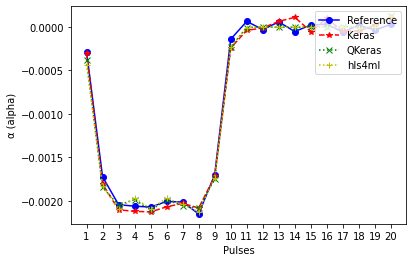

Test # 75


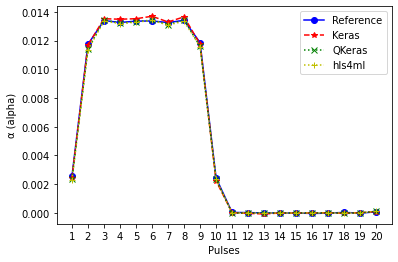

Test # 76


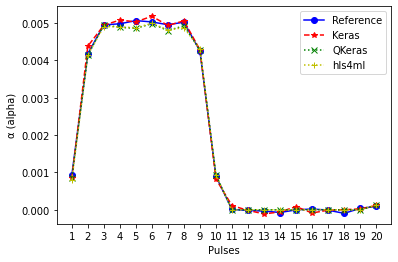

Test # 77


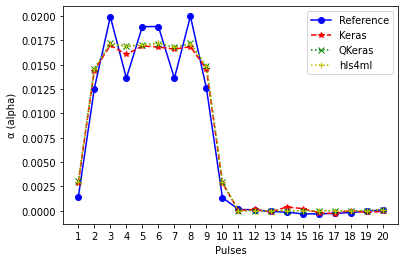

Test # 78


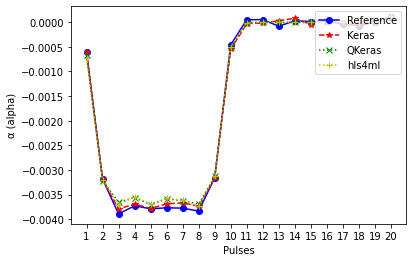

Test # 79


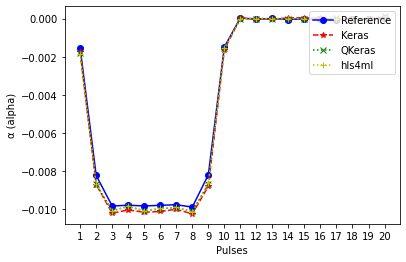

Test # 80


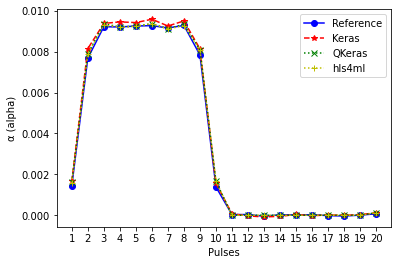

Test # 81


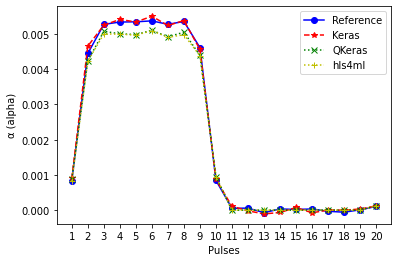

Test # 82


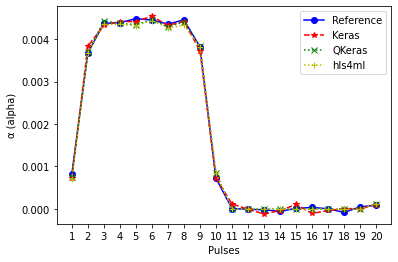

Test # 83


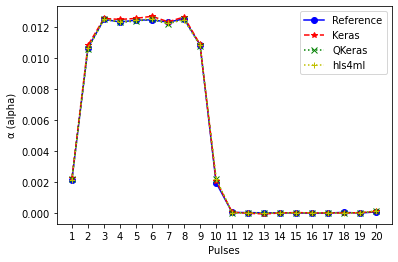

Test # 84


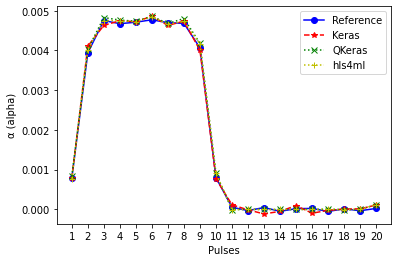

Test # 85


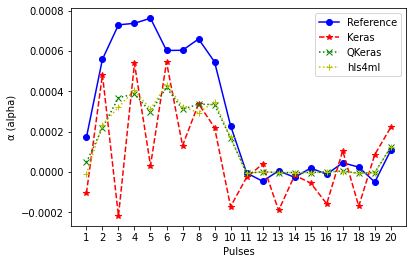

Test # 86


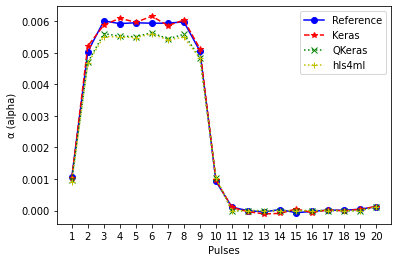

Test # 87


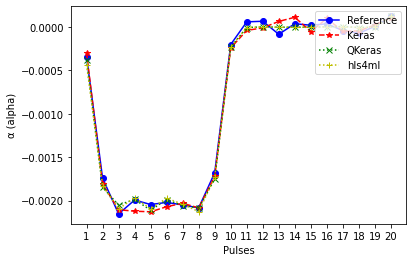

Test # 88


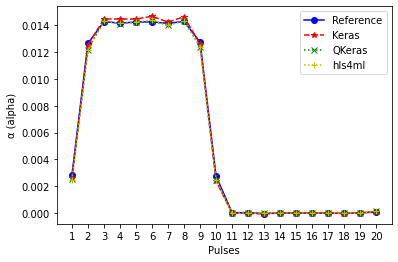

Test # 89


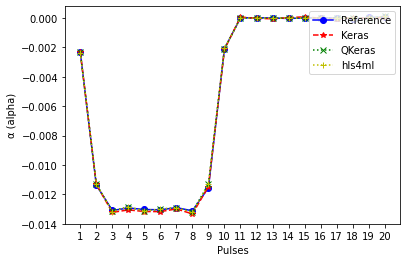

Test # 90


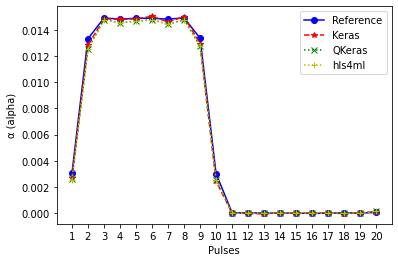

Test # 91


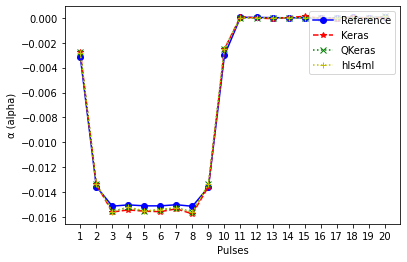

Test # 92


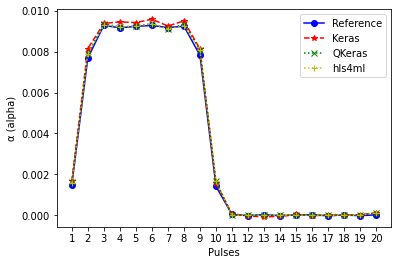

Test # 93


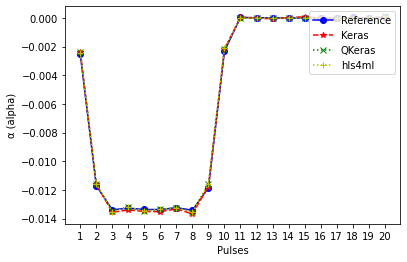

Test # 94


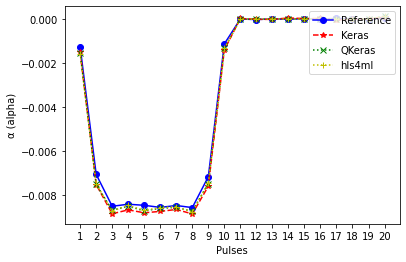

Test # 95


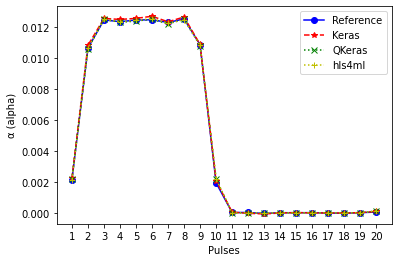

Test # 96


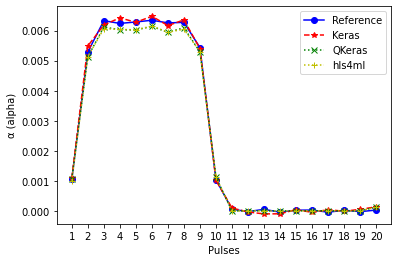

Test # 97


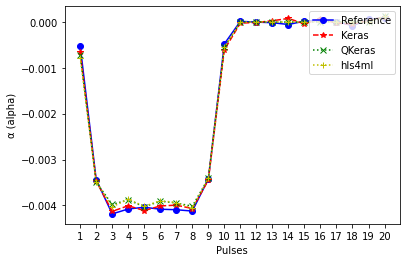

Test # 98


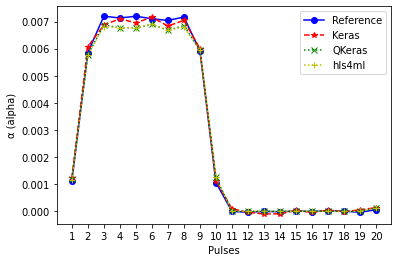

Test # 99


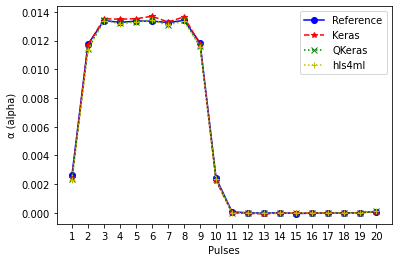

Test # 100


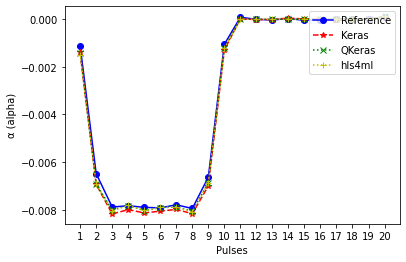

Test # 101


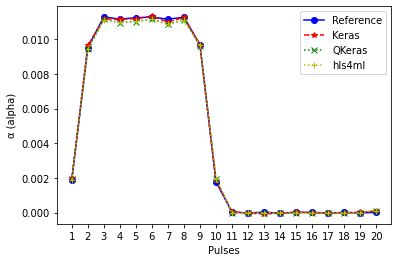

Test # 102


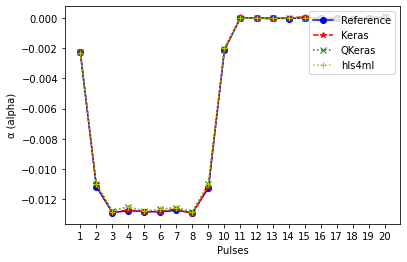

Test # 103


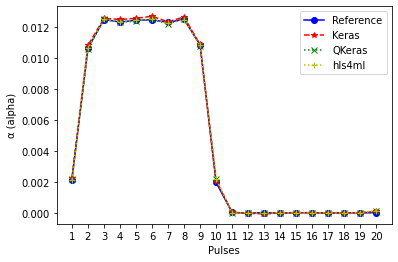

Test # 104


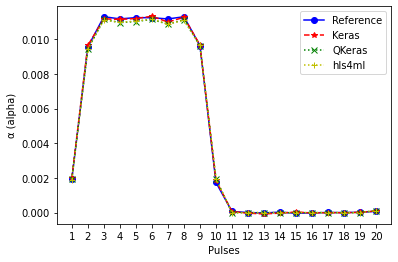

Test # 105


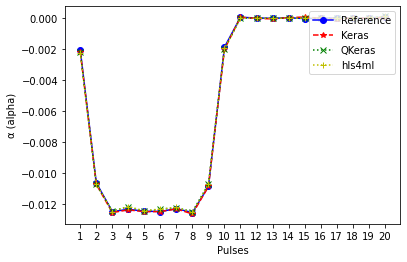

Test # 106


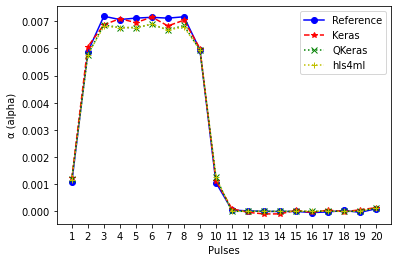

Test # 107


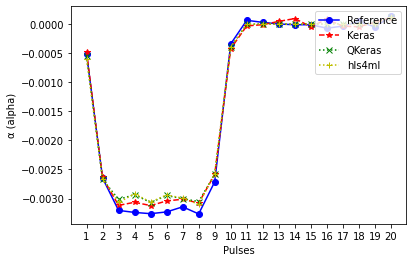

Test # 108


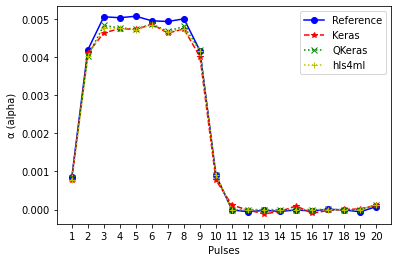

Test # 109


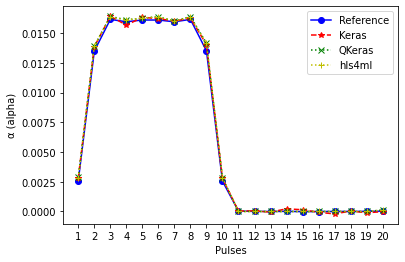

Test # 110


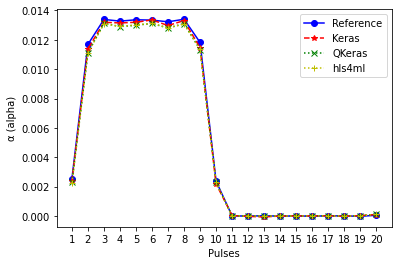

Test # 111


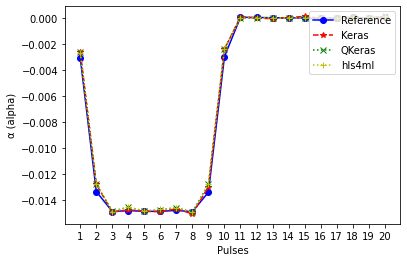

Test # 112


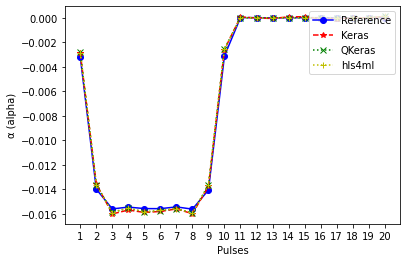

Test # 113


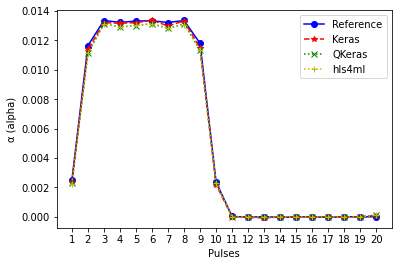

Test # 114


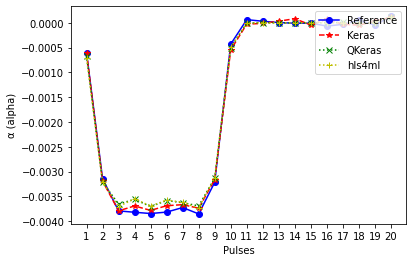

Test # 115


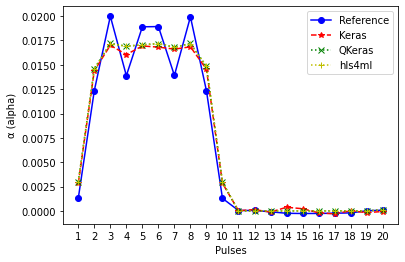

Test # 116


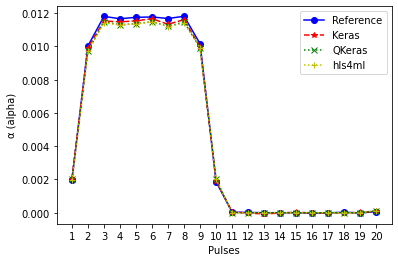

Test # 117


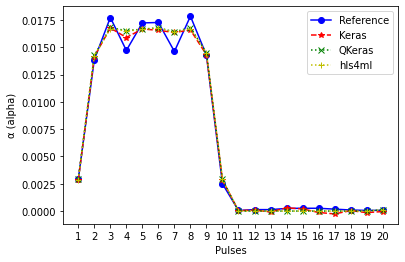

Test # 118


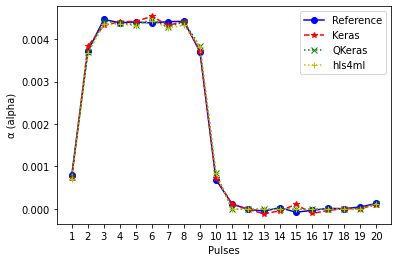

In [111]:
x = np.arange(1, Y_test.shape[1]+1, 1)
for i in range(Y_test.shape[0]):
    print('Test #', i)
    plt.clf()
    #plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(x, Y_test.to_numpy()[i], marker='o', linestyle='-', color='b') 
    plt.plot(x, Y_keras[i], marker='*', linestyle='--', color='r')
    plt.plot(x, Y_qkeras[i], marker='x', linestyle=':', color='g')
    plt.plot(x, Y_hls4ml[i], marker='+', linestyle=':', color='y')
    plt.xticks(x, x)
    plt.legend(['Reference', 'Keras', 'QKeras','hls4ml'], loc='upper right')
    plt.ylabel('α (alpha)')
    plt.xlabel('Pulses')
    plt.show()

#### Hardware

In [112]:
%%time
results = hmodel.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.1 (64-bit)
  **** SW Build 2552052 on Fri May 24 14:47:09 MDT 2019
  **** IP Build 2548770 on Fri May 24 18:01:18 MDT 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'giuseppe' on host 'sam' (Linux_x86_64 version 5.4.0-122-generic) on Sun Aug 07 18:48:21 PDT 2022
INFO: [HLS 200-10] On os Ubuntu 18.04.2 LTS (beaver-osp1-ygritte X40)
INFO: [HLS 200-10] In directory '/home/giuseppe/research/projects/quantum/ml4quantum-release/model/appendix/forward_problem/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/giuseppe/research/projects/quantum/ml4quantum-release/model/appendix/forward_problem/hls4ml_prj/myproject_prj'.
INFO

INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:15) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:18) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::__signbit' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:59) automatically.
INFO: [XFORM 203-602] Inlining function 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' into 'generic_cast_IEEE754<int, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/Float

INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_latency.h:81) in function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>' completely with a factor of 20.
INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_activation.h:69) in function 'nnet::relu<ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config19>' completely with a factor of 12.
INFO: [HLS 200-489] Unrolling loop 'Product1' (firmware/nnet_utils/nnet_dense_latency.h:59) in function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>' completely with a factor of 12.
INFO: [HLS 200-489] Unrolling loop 'Product2' (firmware/nnet_utils/nnet_dense_latency.h:61) in function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3

INFO: [XFORM 203-131] Reshaping array 'fc1_input.V' (firmware/myproject.cpp:25) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer20_out.V' (firmware/myproject.cpp:26) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer2_out.V' (firmware/myproject.cpp:63) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer4_out.V' (firmware/myproject.cpp:67) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer5_out.V' (firmware/myproject.cpp:71) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer7_out.V' (firmware/myproject.cpp:75) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer8_out.V' (firmware/myproject.cpp:79) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer10_out.V' (firmware/myproject.cpp:83) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer11_out.V' (firmware/myproject.cpp:87) in dimension 1 completely.
IN

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>'(firmware/nnet_utils/nnet_dense_latency.h:48:27) to 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:111) by setting 'weights.V' to 'w20.V'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0'(firmware/nnet_utils/nnet_dense_latency.h:48:27) to 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:111) by setting 'biases[0].V' to 'b20.V.0'.
INFO: [XFORM 203-622] Instantiating function 'nnet::

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<24, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:48:27) to 'nnet::dense_latency<ap_ufixed<24, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:97) by setting 'biases[3].V' to 'b14.V.3'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<24, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:48:27) to 'nnet::dense_latency<ap_ufixed<24, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:97) by setting 'biases[4].V' to 'b14.V.4'.
INFO: [XFORM 203-6

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<14, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config8>.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:48:27) to 'nnet::dense_latency<ap_ufixed<14, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config8>.0.0.0.0.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:81) by setting 'biases[4].V' to 'b8.V.4'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<14, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config8>.0.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:48:27) to 'nnet::dense_latency<ap_ufixed<14, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config8>.0.0.0.0.0.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:81) by setting 'biases[5].V' to 'b8.V.5'.
INFO: [XFORM 203

INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation.h:64:18) to (firmware/nnet_utils/nnet_activation.h:74:1) in function 'nnet::relu<ap_fixed<23, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<14, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config7>'... converting 17 basic blocks.
INFO: [XFORM 203-11] Balancing expressions in function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' (firmware/nnet_utils/nnet_dense_latency.h:48:27)...227 expression(s) balanced.
INFO: [XFORM 203-11] Balancing expressions in function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>.0.0.0.0.0.0.0.0.0.0.0.0.0' (firmware/nnet_utils/nnet_dense_latency.h:48:13)...144 expression(s) balanced.
INFO: [XFORM 203-11] Balancing expressions in function 'nnet::dense_latency<ap_

INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.03 seconds; current allocated memory: 424.566 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'dense_latency_0_0_0_0_0_0_0_0_0' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'dense_latency.0.0.0.0.0.0.0.0.0'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 2.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.13 seconds; current allocated memory: 425.157 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global 

INFO: [SCHED 204-61] Pipelining function 'dense_latency.0.0.0.0.0.0.0.0.0.0.0.0.0'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 2.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.46 seconds; current allocated memory: 446.937 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.65 seconds; current allocated memory: 450.994 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'relu_ap_fixed_ap_ufixed_28_4_5_3_0_relu_config19_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting schedulin

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_ap_fixed_ap_ufixed_28_4_5_3_0_relu_config19_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_ap_fixed_ap_ufixed_28_4_5_3_0_relu_config19_s'.
INFO: [HLS 200-111]  Elapsed time: 1.7 seconds; current allocated memory: 535.419 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_latency_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-104] Estimated max fanout for 'dense_latency_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0' is 9534 from HDL expression: ((1'b0 == ap_block_pp0_stage0_11001) & (1'b1 == ap_ce_reg))
INFO: [RTGEN 206-100] Finished creating RTL model for 'dense_latenc

In [113]:
print('-----------------------------------')
#print(results) # Print hashmap
hls_results=results['CSynthesisReport'] 
print("Estimated Clock Period: {} ns".format(hls_results['EstimatedClockPeriod']))
print("Best/Worst Latency:     {} / {}".format(hls_results['BestLatency'], hls_results['WorstLatency']))
print("Interval Min/Max:       {} / {}".format(hls_results['IntervalMin'], hls_results['IntervalMax']))
print("BRAM_18K:               {}, {:0.1f}% (Aval. {})".format(hls_results['BRAM_18K'], int(hls_results['BRAM_18K'])*100.0/int(hls_results['AvailableBRAM_18K']), hls_results['AvailableBRAM_18K']))
print("DSP48E:                 {}, {:0.1f}% (Aval. {})".format(hls_results['DSP48E'], int(hls_results['DSP48E'])*100.0/int(hls_results['AvailableDSP48E']), hls_results['AvailableDSP48E']))
print("FF:                     {}, {:0.1f}% (Aval. {})".format(hls_results['FF'], int(hls_results['FF'])*100.0/int(hls_results['AvailableFF']), hls_results['AvailableFF']))
print("LUT:                    {}, {:0.1f}% (Aval. {})".format(hls_results['LUT'], int(hls_results['LUT'])*100.0/int(hls_results['AvailableLUT']), hls_results['AvailableLUT']))
#print("URAM:                   {}, {} (Aval. {})".format(hls_results['URAM'], int(hls_results['URAM'])*100.0/int(hls_results['AvailableURAM']), hls_results['AvailableURAM']))
print('-----------------------------------')

-----------------------------------
Estimated Clock Period: 4.354 ns
Best/Worst Latency:     22 / 22
Interval Min/Max:       1 / 1
BRAM_18K:               0, 0.0% (Aval. 432)
DSP48E:                 1135, 315.3% (Aval. 360)
FF:                     29082, 20.6% (Aval. 141120)
LUT:                    67595, 95.8% (Aval. 70560)
-----------------------------------


In [114]:
from metrics import write_hls_report

hls_report_file = prefix + 'forward_problem_hls_report.csv'
write_hls_report(hls_report_file, hls_results)

In [115]:
from metrics import print_hls_report
print_hls_report(hls_report_file)

Date  EstimatedClockPeriod  BestLatency  WorstLatency  \
0  07/08/2022 09:04:01        4.354000000000           22            22   
1  07/08/2022 09:06:41        4.354000000000           22            22   
2  07/08/2022 09:17:25        4.354000000000           22            22   
3  07/08/2022 13:58:41        4.354000000000           22            22   
4  07/08/2022 14:14:08        4.354000000000           22            22   
5  07/08/2022 18:04:15        4.354000000000           22            22   
6  07/08/2022 18:49:26        4.354000000000           22            22   

   IntervalMin  IntervalMax  BRAM_18K  AvailableBRAM_18K  DSP48E  \
0            1            1         0                432    1135   
1            1            1         0                432    1135   
2            1            1         0                432    1135   
3            1            1         0                432    1135   
4            1            1         0                432    1135   
5            1            1         0                432    1135   
6            1            1         0                432    1135   

   AvailableDSP48E     FF  AvailableFF    LUT  AvailableLUT  URAM  \
0              360  29082       141120  67595         70560     0   
1              360  29082       141120  67595         70560     0   
2              360  29082       141120  67595         70560     0   
3              360  29082       141120  67595         70560     0   
4              360  29082       141120  67595         70560     0   
5              360  29082       141120  67595         70560     0   
6              360  29082       141120  67595         70560     0   

   AvailableURAM  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0

### β ⇒ α[10]

In [116]:
prefix = '../model/appendix/fs_forward_problem/'

#### Keras

##### Create model

Classical multi-layer perceptron: 1 (inputs)- 4 - 6 - 8 - 10 (outputs)

In [117]:
model = Sequential()
model.add(Dense(4, input_shape=(1,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(6, name='fc2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(8, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(10, name='fc4', kernel_initializer='lecun_uniform'))

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 4)                 8         
_________________________________________________________________
relu1 (Activation)           (None, 4)                 0         
_________________________________________________________________
fc2 (Dense)                  (None, 6)                 30        
_________________________________________________________________
relu2 (Activation)           (None, 6)                 0         
_________________________________________________________________
fc3 (Dense)                  (None, 8)                 56        
_________________________________________________________________
relu3 (Activation)           (None, 8)                 0         
_________________________________________________________________
fc4 (Dense)                  (None, 10)               

In [119]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           1
               Dense   XXXXX -------------------         8     4.3%
                relu   #####           4
               Dense   XXXXX -------------------        30    16.3%
                relu   #####           6
               Dense   XXXXX -------------------        56    30.4%
                relu   #####           8
               Dense   XXXXX -------------------        90    48.9%
                       #####          10


##### Training

In [120]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [121]:
best_model_file = prefix + '/best_keras_fs_model.h5'
last_model_file = prefix + '/last_keras_fs_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [122]:
train_and_save = False
history = None
if train_and_save:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = model.fit(x_fs_train,
                        Y_fs_train,
                        epochs=5000,
                        validation_data=(x_fs_val, Y_fs_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    model.save(last_model_file)

Load the saved best model and use it from now on.

In [123]:
model = load_model(best_model_file)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

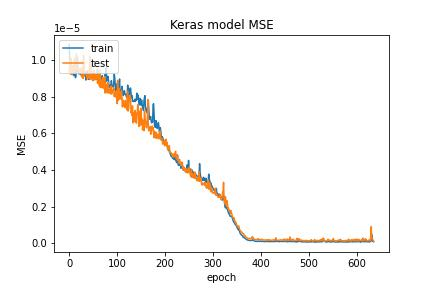

In [124]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='Keras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [125]:
mse, msle, mape = model.evaluate(x_fs_test, Y_fs_test)

4/4 [==============================] - 0s 1ms/step - loss: 1.2684e-07 - mean_squared_logarithmic_error: 9.9144e-08 - mean_absolute_percentage_error: 13.6291


In [126]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", mse, msle, mape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE           MSLE            MAPE
0  Keras 0.000000126845 0.000000099144 13.629078865051

Save metrics values to file for future reference.

In [127]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [128]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'Keras', mse, msle, mape)

In [129]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE  \
0   07/08/2022 09:59:16     Keras 0.000000337346 0.000000220407   
1   07/08/2022 10:33:23    QKeras 0.000000180566 0.000000137010   
2   07/08/2022 10:34:59    hls4ml 0.000000934546            NaN   
3   07/08/2022 13:29:58     Keras 0.000009174036 0.000008963096   
4   07/08/2022 13:31:10     Keras 0.000000126845 0.000000099144   
5   07/08/2022 13:44:20    QKeras 0.000073828349 0.000041381860   
6   07/08/2022 13:45:17    QKeras 0.000000198510 0.000000126487   
7   07/08/2022 13:58:41     Keras 0.000000126845 0.000000099144   
8   07/08/2022 13:58:42    QKeras 0.000000198510 0.000000126487   
9   07/08/2022 13:58:46    hls4ml 0.000001053467            NaN   
10  07/08/2022 14:11:51    hls4ml 0.000001053467            NaN   
11  07/08/2022 14:14:09     Keras 0.000000126845 0.000000099144   
12  07/08/2022 14:14:09    QKeras 0.000000198510 0.000000126487   
13  07/08/2022 14:16:56    hls4ml 0.000001053467            NaN   
14  07/08/2022 14:17:25    hls4ml 0.000000507379            NaN   
15  07/08/2022 14:18:46    hls4ml 0.000000198045            NaN   
16  07/08/2022 14:28:59    hls4ml 0.000000198045            NaN   
17  07/08/2022 14:29:27    hls4ml 0.000000198045            NaN   
18  07/08/2022 15:36:07    hls4ml 0.000000198045            NaN   
19  07/08/2022 17:19:35    hls4ml 0.000000198045            NaN   
20  07/08/2022 17:20:11    hls4ml 0.000000198045            NaN   
21  07/08/2022 17:21:01    hls4ml 0.000000198045            NaN   
22  07/08/2022 17:21:37    hls4ml 0.000000198045            NaN   
23  07/08/2022 17:23:19    hls4ml 0.000000198045            NaN   
24  07/08/2022 17:25:35    hls4ml 0.000000198836            NaN   
25  07/08/2022 17:26:05    hls4ml 0.000000198213            NaN   
26  07/08/2022 17:26:34    hls4ml 0.000000198206            NaN   
27  07/08/2022 17:27:15    hls4ml 0.000139521255            NaN   
28  07/08/2022 17:27:51    hls4ml 0.000000198062            NaN   
29  07/08/2022 17:28:22    hls4ml 0.000000198045            NaN   
30  07/08/2022 17:29:14    hls4ml 0.000000198091            NaN   
31  07/08/2022 17:29:36    hls4ml 0.000000198061            NaN   
32  07/08/2022 17:32:54    hls4ml 0.000000198045            NaN   
33  07/08/2022 17:33:49    hls4ml 0.000000198044            NaN   
34  07/08/2022 17:34:18    hls4ml 0.000000198043            NaN   
35  07/08/2022 17:34:55    hls4ml 0.000000198043            NaN   
36  07/08/2022 17:35:20    hls4ml 0.000000198015            NaN   
37  07/08/2022 17:36:10    hls4ml 0.000000198015            NaN   
38  07/08/2022 17:36:27    hls4ml 0.000000198001            NaN   
39  07/08/2022 18:04:16     Keras 0.000000126845 0.000000099144   
40  07/08/2022 18:04:17    QKeras 0.000000198510 0.000000126487   
41  07/08/2022 18:16:34    hls4ml 0.000000198001            NaN   
42  07/08/2022 18:49:27     Keras 0.000000126845 0.000000099144   

               MAPE  
0   75.322708129883  
1   25.226497650146  
2               NaN  
3  121.108093261719  
4   13.629078865051  
5  100.406318664551  
6   59.953376770020  
7   13.629078865051  
8   59.953376770020  
9               NaN  
10              NaN  
11  13.629078865051  
12  59.953376770020  
13              NaN  
14              NaN  
15              NaN  
16              NaN  
17              NaN  
18              NaN  
19              NaN  
20              NaN  
21              NaN  
22              NaN  
23              NaN  
24              NaN  
25              NaN  
26              NaN  
27              NaN  
28              NaN  
29              NaN  
30              NaN  
31              NaN  
32              NaN  
33              NaN  
34              NaN  
35              NaN  
36              NaN  
37              NaN  
38              NaN  
39  13.629078865051  
40  59.953376770020  
41              NaN  
42  13.629078865051

#### QAT/QKeras

##### Create model

As before, a classical multi-layer perceptron: 1 (inputs)- 4 - 6 - 8 - 10 (outputs).

In [130]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

Remember that `ap_fixed<16, 8, true>` is `quantized_bits(bits=16,integer=7)`.

In [131]:
# Build quantized model
W=22
I=6

qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(4,
                  input_shape=(1,),
                  name='fc1',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu1'))
qmodel.add(QDense(6,
                  input_shape=(1,),
                  name='fc2',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu2'))
qmodel.add(QDense(8,
                  name='fc3',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu3'))
qmodel.add(QDense(10,
                  name='fc4',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))

In [132]:
qmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (QDense)                 (None, 4)                 8         
_________________________________________________________________
relu1 (QActivation)          (None, 4)                 0         
_________________________________________________________________
fc2 (QDense)                 (None, 6)                 30        
_________________________________________________________________
relu2 (QActivation)          (None, 6)                 0         
_________________________________________________________________
fc3 (QDense)                 (None, 8)                 56        
_________________________________________________________________
relu3 (QActivation)          (None, 8)                 0         
_________________________________________________________________
fc4 (QDense)                 (None, 10)               

##### Training

In [133]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [134]:
best_model_file = prefix + '/best_qkeras_fs_model.h5'
last_model_file = prefix + '/last_qkeras_fs_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [135]:
train_and_save = False
history = None
if train_and_save:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.01),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = qmodel.fit(x_fs_train,
                        Y_fs_train,
                        epochs=5000,
                        validation_data=(x_fs_val, Y_fs_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    qmodel.save(last_model_file)

Load the saved best model and use it from now on.

In [136]:
co = {}
qkeras.utils._add_supported_quantized_objects(co)
qmodel = tf.keras.models.load_model(best_model_file, custom_objects=co)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

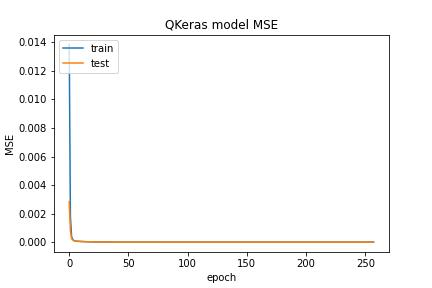

In [137]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='QKeras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [138]:
qmse, qmsle, qmape = qmodel.evaluate(x_fs_test, Y_fs_test)

4/4 [==============================] - 0s 1ms/step - loss: 1.9851e-07 - mean_squared_logarithmic_error: 1.2649e-07 - mean_absolute_percentage_error: 59.9534


Save metrics values to file for future reference.

In [139]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [140]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["QKeras", qmse, qmsle, qmape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE           MSLE            MAPE
0  QKeras 0.000000198510 0.000000126487 59.953376770020

In [141]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'QKeras', qmse, qmsle, qmape)

In [142]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE  \
0   07/08/2022 09:59:16     Keras 0.000000337346 0.000000220407   
1   07/08/2022 10:33:23    QKeras 0.000000180566 0.000000137010   
2   07/08/2022 10:34:59    hls4ml 0.000000934546            NaN   
3   07/08/2022 13:29:58     Keras 0.000009174036 0.000008963096   
4   07/08/2022 13:31:10     Keras 0.000000126845 0.000000099144   
5   07/08/2022 13:44:20    QKeras 0.000073828349 0.000041381860   
6   07/08/2022 13:45:17    QKeras 0.000000198510 0.000000126487   
7   07/08/2022 13:58:41     Keras 0.000000126845 0.000000099144   
8   07/08/2022 13:58:42    QKeras 0.000000198510 0.000000126487   
9   07/08/2022 13:58:46    hls4ml 0.000001053467            NaN   
10  07/08/2022 14:11:51    hls4ml 0.000001053467            NaN   
11  07/08/2022 14:14:09     Keras 0.000000126845 0.000000099144   
12  07/08/2022 14:14:09    QKeras 0.000000198510 0.000000126487   
13  07/08/2022 14:16:56    hls4ml 0.000001053467            NaN   
14  07/08/2022 14:17:25    hls4ml 0.000000507379            NaN   
15  07/08/2022 14:18:46    hls4ml 0.000000198045            NaN   
16  07/08/2022 14:28:59    hls4ml 0.000000198045            NaN   
17  07/08/2022 14:29:27    hls4ml 0.000000198045            NaN   
18  07/08/2022 15:36:07    hls4ml 0.000000198045            NaN   
19  07/08/2022 17:19:35    hls4ml 0.000000198045            NaN   
20  07/08/2022 17:20:11    hls4ml 0.000000198045            NaN   
21  07/08/2022 17:21:01    hls4ml 0.000000198045            NaN   
22  07/08/2022 17:21:37    hls4ml 0.000000198045            NaN   
23  07/08/2022 17:23:19    hls4ml 0.000000198045            NaN   
24  07/08/2022 17:25:35    hls4ml 0.000000198836            NaN   
25  07/08/2022 17:26:05    hls4ml 0.000000198213            NaN   
26  07/08/2022 17:26:34    hls4ml 0.000000198206            NaN   
27  07/08/2022 17:27:15    hls4ml 0.000139521255            NaN   
28  07/08/2022 17:27:51    hls4ml 0.000000198062            NaN   
29  07/08/2022 17:28:22    hls4ml 0.000000198045            NaN   
30  07/08/2022 17:29:14    hls4ml 0.000000198091            NaN   
31  07/08/2022 17:29:36    hls4ml 0.000000198061            NaN   
32  07/08/2022 17:32:54    hls4ml 0.000000198045            NaN   
33  07/08/2022 17:33:49    hls4ml 0.000000198044            NaN   
34  07/08/2022 17:34:18    hls4ml 0.000000198043            NaN   
35  07/08/2022 17:34:55    hls4ml 0.000000198043            NaN   
36  07/08/2022 17:35:20    hls4ml 0.000000198015            NaN   
37  07/08/2022 17:36:10    hls4ml 0.000000198015            NaN   
38  07/08/2022 17:36:27    hls4ml 0.000000198001            NaN   
39  07/08/2022 18:04:16     Keras 0.000000126845 0.000000099144   
40  07/08/2022 18:04:17    QKeras 0.000000198510 0.000000126487   
41  07/08/2022 18:16:34    hls4ml 0.000000198001            NaN   
42  07/08/2022 18:49:27     Keras 0.000000126845 0.000000099144   
43  07/08/2022 18:49:27    QKeras 0.000000198510 0.000000126487   

               MAPE  
0   75.322708129883  
1   25.226497650146  
2               NaN  
3  121.108093261719  
4   13.629078865051  
5  100.406318664551  
6   59.953376770020  
7   13.629078865051  
8   59.953376770020  
9               NaN  
10              NaN  
11  13.629078865051  
12  59.953376770020  
13              NaN  
14              NaN  
15              NaN  
16              NaN  
17              NaN  
18              NaN  
19              NaN  
20              NaN  
21              NaN  
22              NaN  
23              NaN  
24              NaN  
25              NaN  
26              NaN  
27              NaN  
28              NaN  
29              NaN  
30              NaN  
31              NaN  
32              NaN  
33              NaN  
34              NaN  
35              NaN  
36              NaN  
37              NaN  
38              NaN  
39  13.629078865051  
40  59.953376770020  
41              NaN  
42  13.629078865051  
43  59.953376770020

#### hls4ml

##### Convert model

In [143]:
import hls4ml

In [144]:
print('hls4ml ver.', hls4ml.__version__)

hls4ml ver. 0.5.1


In [145]:
hconfig = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')
hconfig['Model']['Precision'] = 'ap_fixed<32,6>'
hconfig['LayerName']['fc1_input']['Precision']['result'] = 'ap_fixed<20,3>'
hconfig['LayerName']['fc1']['Precision']['result'] = 'ap_fixed<22,4>'
hconfig['LayerName']['relu1']['Precision']['result'] = 'ap_ufixed<22,4>'
hconfig['LayerName']['fc2']['Precision']['result'] = 'ap_fixed<22,4>'
hconfig['LayerName']['relu2']['Precision']['result'] = 'ap_ufixed<22,4>'
hconfig['LayerName']['fc3']['Precision']['result'] = 'ap_fixed<32,4>'
hconfig['LayerName']['relu3']['Precision']['result'] = 'ap_ufixed<22,4>'
hconfig['LayerName']['fc4']['Precision']['result'] = 'ap_fixed<28,3>'

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: Input
Layer name: fc1, layer type: QDense
  -> Activation (linear), layer name: fc1
Layer name: relu1, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu1
Layer name: fc2, layer type: QDense
  -> Activation (linear), layer name: fc2
Layer name: relu2, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu2
Layer name: fc3, layer type: QDense
  -> Activation (linear), layer name: fc3
Layer name: relu3, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu3
Layer name: fc4, layer type: QDense
  -> Activation (linear), layer name: fc4


Enable tracing for all of the layers

In [163]:
for layer in hconfig['LayerName'].keys():
    print('Enable tracing for layer:', layer)
    hconfig['LayerName'][layer]['Trace'] = True

Enable tracing for layer: fc1_input
Enable tracing for layer: fc1
Enable tracing for layer: fc1_linear
Enable tracing for layer: relu1
Enable tracing for layer: relu1_quantized_relu
Enable tracing for layer: fc2
Enable tracing for layer: fc2_linear
Enable tracing for layer: relu2
Enable tracing for layer: relu2_quantized_relu
Enable tracing for layer: fc3
Enable tracing for layer: fc3_linear
Enable tracing for layer: relu3
Enable tracing for layer: relu3_quantized_relu
Enable tracing for layer: fc4
Enable tracing for layer: fc4_linear


Show hls4ml configuration.

In [164]:
import plotting
plotting.print_dict(hconfig)

Model
  Precision:         ap_fixed<32,6>
  ReuseFactor:       1
  Strategy:          Latency
LayerName
  fc1_input
    Precision
      result:        ap_fixed<20,3>
    Trace:           True
  fc1
    Precision
      weight:        ap_fixed<22,6>
      bias:          ap_fixed<22,6>
      result:        ap_fixed<22,4>
    ReuseFactor:     1
    Trace:           True
  fc1_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
    Trace:           True
  relu1
    Precision
      result:        ap_ufixed<22,4>
    ReuseFactor:     1
    Trace:           True
  relu1_quantized_relu
    Precision
      result:        ap_ufixed<22,5>
    ReuseFactor:     1
    Trace:           True
  fc2
    Precision
      weight:        ap_fixed<22,6>
      bias:          ap_fixed<22,6>
      result:        ap_fixed<22,4>
    ReuseFactor:     1
    Trace:           True
  fc2_linear
    Precision:       ap_fixed<16,6>
    ReuseFacto

In [165]:
hmodel = hls4ml.converters.convert_from_keras_model(qmodel,
                                                    hls_config=hconfig,
                                                    output_dir=prefix+'hls4ml_prj',
                                                    part='xczu3eg-sbva484-1-e')
                                                    #part='xc7a100t-csg324-3')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: fc1, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 4]
Layer name: relu1, layer type: Activation, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc2, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 6]
Layer name: relu2, layer type: Activation, input shapes: [[None, 6]], output shape: [None, 6]
Layer name: fc3, layer type: QDense, input shapes: [[None, 6]], output shape: [None, 8]
Layer name: relu3, layer type: Activation, input shapes: [[None, 8]], output shape: [None, 8]
Layer name: fc4, layer type: QDense, input shapes: [[None, 8]], output shape: [None, 10]
Creating HLS model


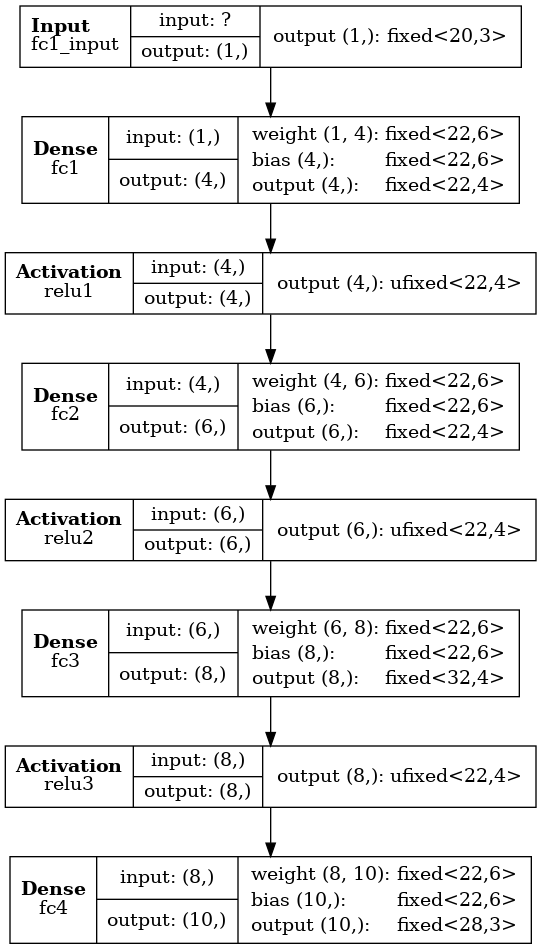

In [166]:
hls4ml.utils.plot_model(hmodel, show_shapes=True, show_precision=True, to_file=None)

In [167]:
hmodel.compile()

Writing HLS project
Done


##### Tracing and debugging

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: fc1, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 4]
Layer name: relu1, layer type: Activation, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc2, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 6]
Layer name: relu2, layer type: Activation, input shapes: [[None, 6]], output shape: [None, 6]
Layer name: fc3, layer type: QDense, input shapes: [[None, 6]], output shape: [None, 8]
Layer name: relu3, layer type: Activation, input shapes: [[None, 8]], output shape: [None, 8]
Layer name: fc4, layer type: QDense, input shapes: [[None, 8]], output shape: [None, 10]
Creating HLS model
Profiling weights (before optimization)
Profiling weights (final / after optimization)
Profiling activations (before optimization)
   fc1
   relu1
   fc2
   relu2
   fc3
   relu3
   fc4
Profiling activations (final

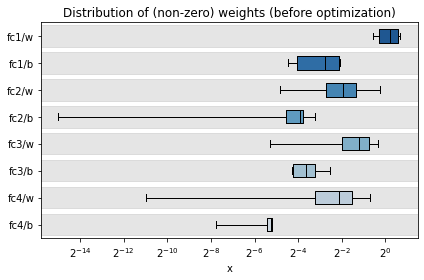

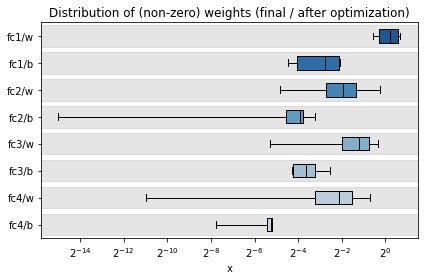

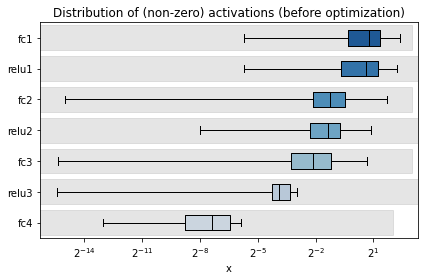

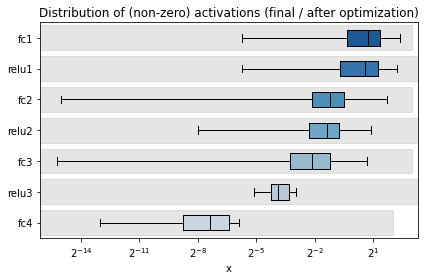

In [168]:
# Run profiling
_ = hls4ml.model.profiling.numerical(model=qmodel, hls_model=hmodel, X=x_fs_test)

##### Evaluation

In [150]:
from metrics import hls4ml_evaluate

In [151]:
hmse = hls4ml_evaluate(hmodel, x_fs_test, Y_fs_test)

In [152]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["hls4ml", hmse, "", ""]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

MSE MSLE MAPE
0  hls4ml 0.000000198001

Save metrics values to file for future reference.

In [153]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [154]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'hls4ml', hmse, "", "")

In [155]:
from metrics import print_metrics
print_metrics(metrics_filename)

Date Framework            MSE           MSLE  \
0   07/08/2022 09:59:16     Keras 0.000000337346 0.000000220407   
1   07/08/2022 10:33:23    QKeras 0.000000180566 0.000000137010   
2   07/08/2022 10:34:59    hls4ml 0.000000934546            NaN   
3   07/08/2022 13:29:58     Keras 0.000009174036 0.000008963096   
4   07/08/2022 13:31:10     Keras 0.000000126845 0.000000099144   
5   07/08/2022 13:44:20    QKeras 0.000073828349 0.000041381860   
6   07/08/2022 13:45:17    QKeras 0.000000198510 0.000000126487   
7   07/08/2022 13:58:41     Keras 0.000000126845 0.000000099144   
8   07/08/2022 13:58:42    QKeras 0.000000198510 0.000000126487   
9   07/08/2022 13:58:46    hls4ml 0.000001053467            NaN   
10  07/08/2022 14:11:51    hls4ml 0.000001053467            NaN   
11  07/08/2022 14:14:09     Keras 0.000000126845 0.000000099144   
12  07/08/2022 14:14:09    QKeras 0.000000198510 0.000000126487   
13  07/08/2022 14:16:56    hls4ml 0.000001053467            NaN   
14  07/08/2022 14:17:25    hls4ml 0.000000507379            NaN   
15  07/08/2022 14:18:46    hls4ml 0.000000198045            NaN   
16  07/08/2022 14:28:59    hls4ml 0.000000198045            NaN   
17  07/08/2022 14:29:27    hls4ml 0.000000198045            NaN   
18  07/08/2022 15:36:07    hls4ml 0.000000198045            NaN   
19  07/08/2022 17:19:35    hls4ml 0.000000198045            NaN   
20  07/08/2022 17:20:11    hls4ml 0.000000198045            NaN   
21  07/08/2022 17:21:01    hls4ml 0.000000198045            NaN   
22  07/08/2022 17:21:37    hls4ml 0.000000198045            NaN   
23  07/08/2022 17:23:19    hls4ml 0.000000198045            NaN   
24  07/08/2022 17:25:35    hls4ml 0.000000198836            NaN   
25  07/08/2022 17:26:05    hls4ml 0.000000198213            NaN   
26  07/08/2022 17:26:34    hls4ml 0.000000198206            NaN   
27  07/08/2022 17:27:15    hls4ml 0.000139521255            NaN   
28  07/08/2022 17:27:51    hls4ml 0.000000198062            NaN   
29  07/08/2022 17:28:22    hls4ml 0.000000198045            NaN   
30  07/08/2022 17:29:14    hls4ml 0.000000198091            NaN   
31  07/08/2022 17:29:36    hls4ml 0.000000198061            NaN   
32  07/08/2022 17:32:54    hls4ml 0.000000198045            NaN   
33  07/08/2022 17:33:49    hls4ml 0.000000198044            NaN   
34  07/08/2022 17:34:18    hls4ml 0.000000198043            NaN   
35  07/08/2022 17:34:55    hls4ml 0.000000198043            NaN   
36  07/08/2022 17:35:20    hls4ml 0.000000198015            NaN   
37  07/08/2022 17:36:10    hls4ml 0.000000198015            NaN   
38  07/08/2022 17:36:27    hls4ml 0.000000198001            NaN   
39  07/08/2022 18:04:16     Keras 0.000000126845 0.000000099144   
40  07/08/2022 18:04:17    QKeras 0.000000198510 0.000000126487   
41  07/08/2022 18:16:34    hls4ml 0.000000198001            NaN   
42  07/08/2022 18:49:27     Keras 0.000000126845 0.000000099144   
43  07/08/2022 18:49:27    QKeras 0.000000198510 0.000000126487   
44  07/08/2022 18:49:32    hls4ml 0.000000198001            NaN   

               MAPE  
0   75.322708129883  
1   25.226497650146  
2               NaN  
3  121.108093261719  
4   13.629078865051  
5  100.406318664551  
6   59.953376770020  
7   13.629078865051  
8   59.953376770020  
9               NaN  
10              NaN  
11  13.629078865051  
12  59.953376770020  
13              NaN  
14              NaN  
15              NaN  
16              NaN  
17              NaN  
18              NaN  
19              NaN  
20              NaN  
21              NaN  
22              NaN  
23              NaN  
24              NaN  
25              NaN  
26              NaN  
27              NaN  
28              NaN  
29              NaN  
30              NaN  
31              NaN  
32              NaN  
33              NaN  
34              NaN  
35              NaN  
36              NaN  
37              NaN  
38              NaN  
39  13.629078865051  
40  59.953376770020  
41          

#### Comparison

In [156]:
Y_keras = model.predict(x_fs_test)
Y_qkeras = qmodel.predict(x_fs_test)
Y_hls4ml = hmodel.predict(np.array(x_fs_test.to_numpy()).reshape((len(x_test), 1)))

Plot and compare the Keras, QKeras, and hls4ml predictions with the reference in the dataset.

In [157]:
print('Expected number of plots (test set size):', Y_test.shape[0])

Expected number of plots (test set size): 119


Test # 0


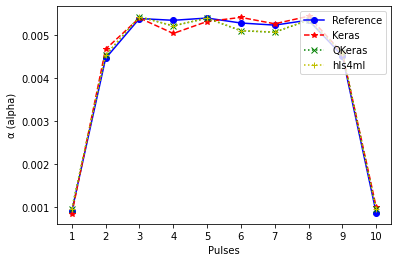

Test # 1


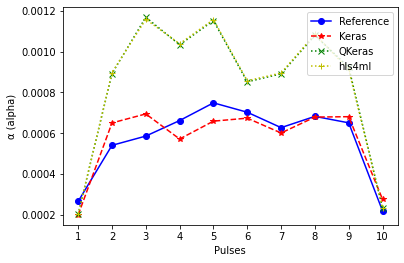

Test # 2


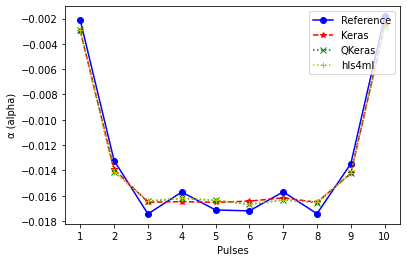

Test # 3


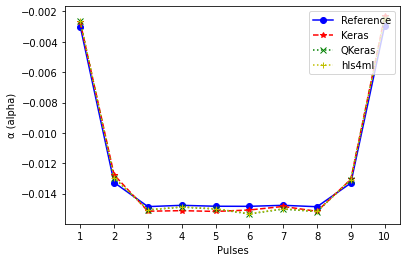

Test # 4


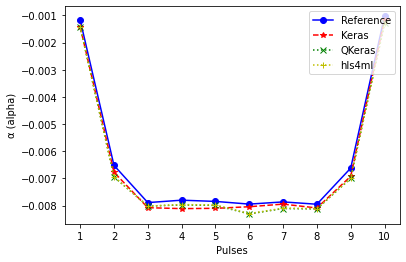

Test # 5


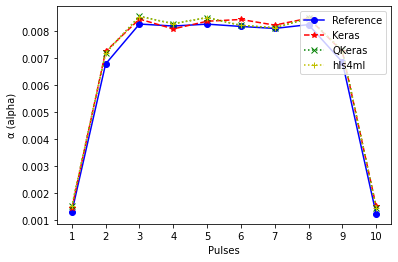

Test # 6


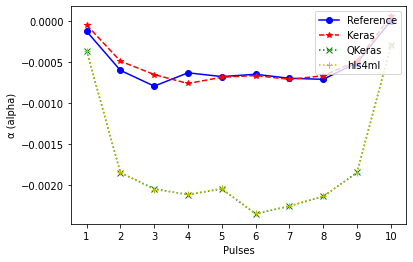

Test # 7


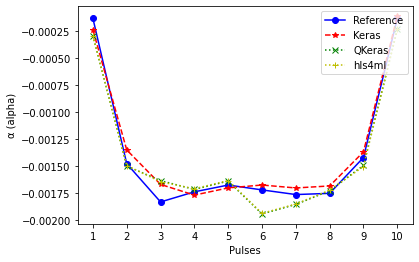

Test # 8


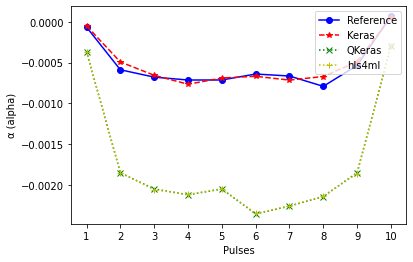

Test # 9


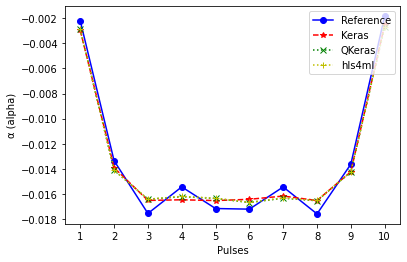

Test # 10


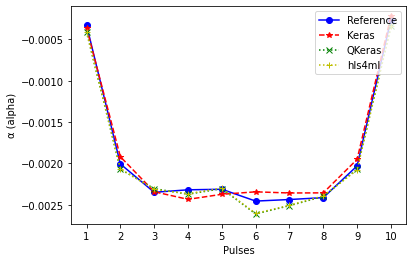

Test # 11


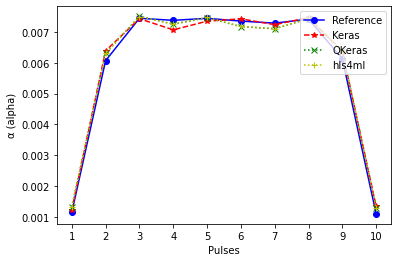

Test # 12


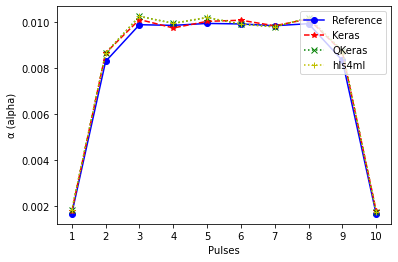

Test # 13


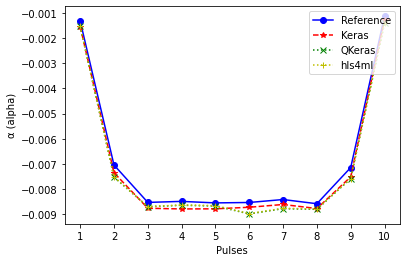

Test # 14


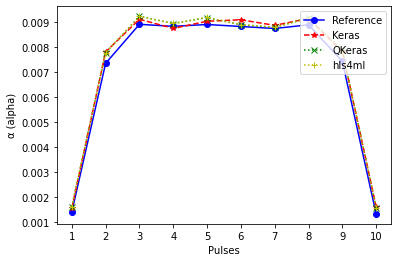

Test # 15


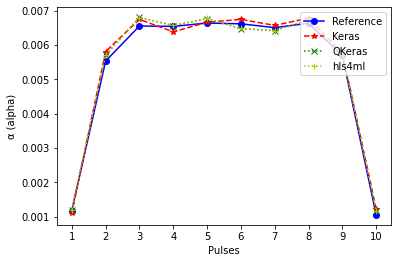

Test # 16


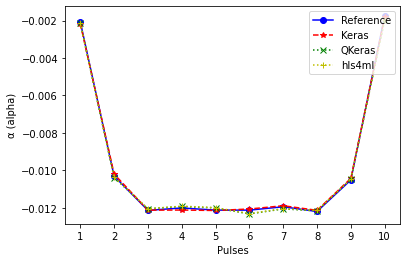

Test # 17


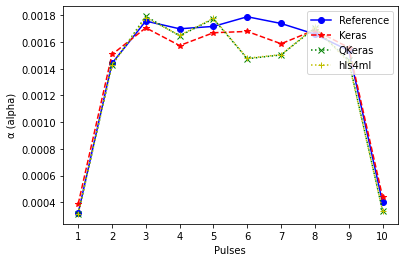

Test # 18


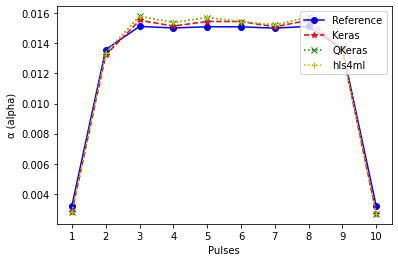

Test # 19


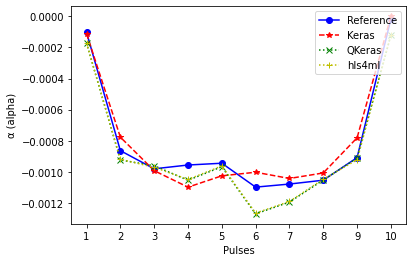

Test # 20


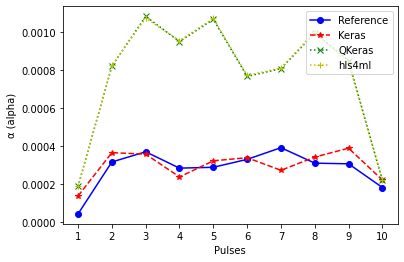

Test # 21


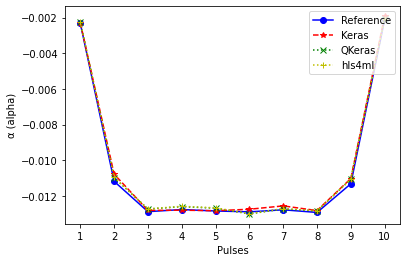

Test # 22


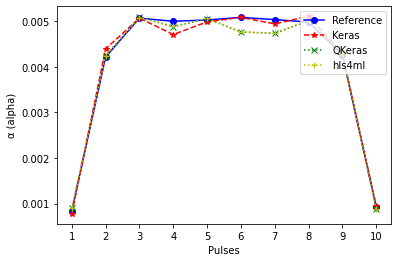

Test # 23


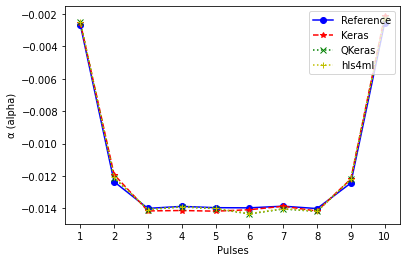

Test # 24


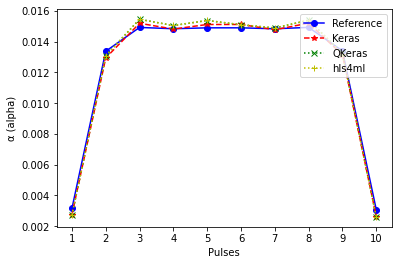

Test # 25


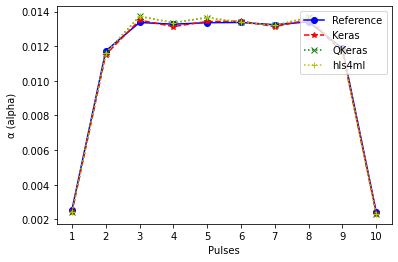

Test # 26


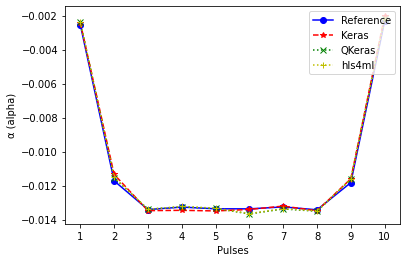

Test # 27


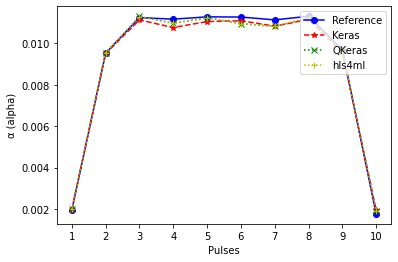

Test # 28


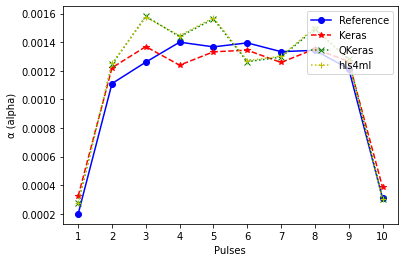

Test # 29


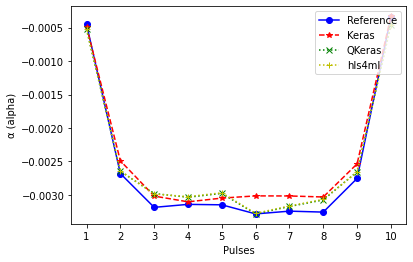

Test # 30


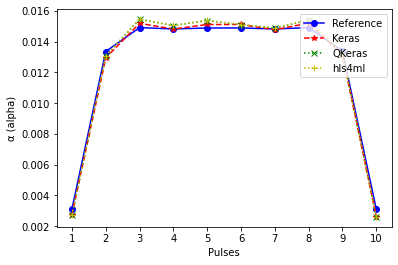

Test # 31


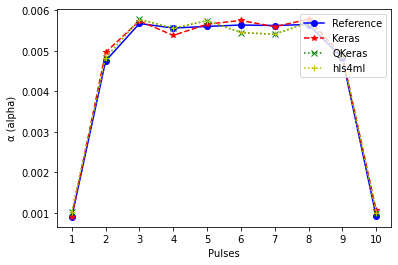

Test # 32


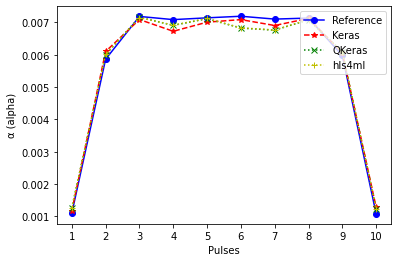

Test # 33


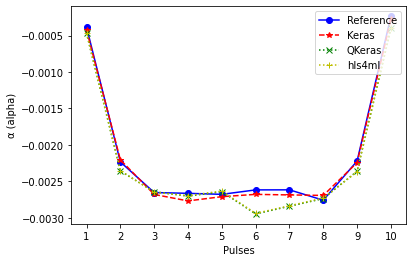

Test # 34


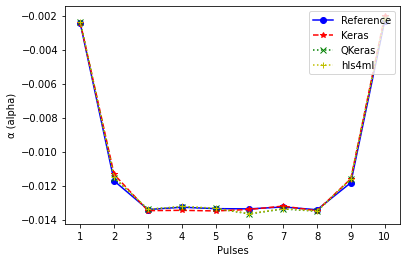

Test # 35


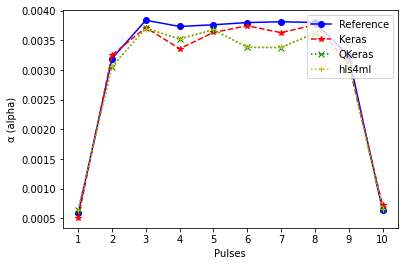

Test # 36


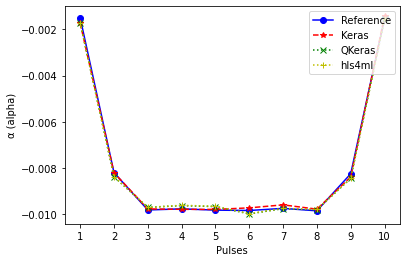

Test # 37


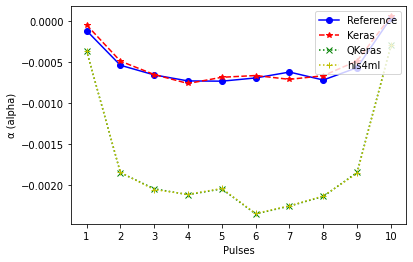

Test # 38


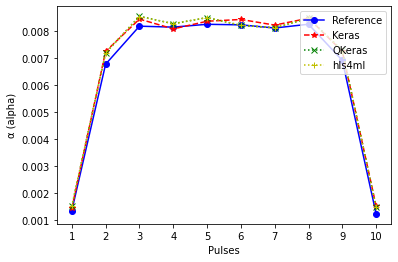

Test # 39


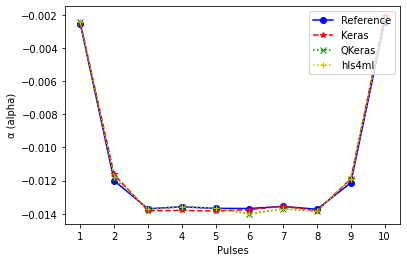

Test # 40


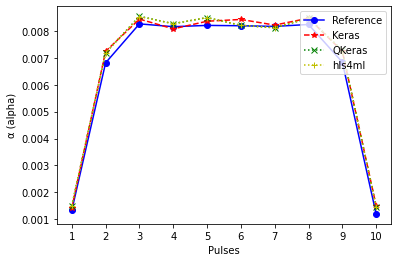

Test # 41


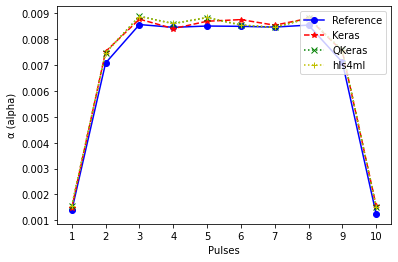

Test # 42


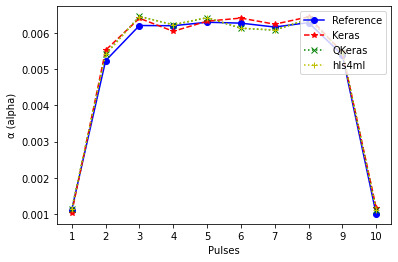

Test # 43


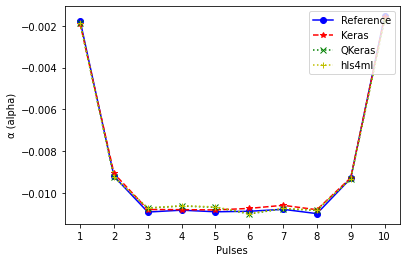

Test # 44


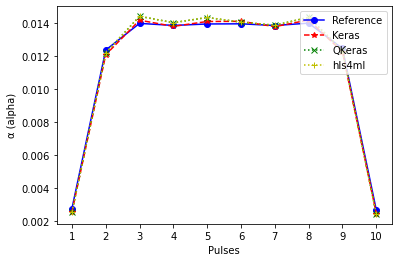

Test # 45


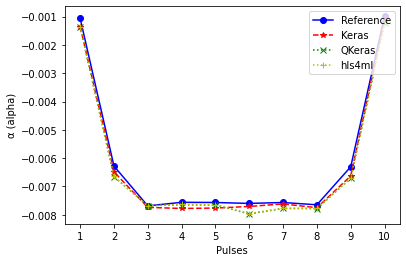

Test # 46


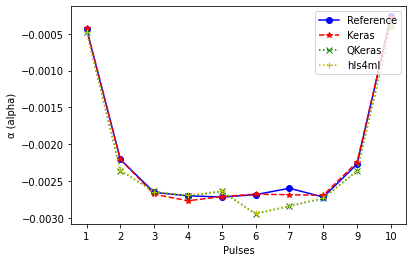

Test # 47


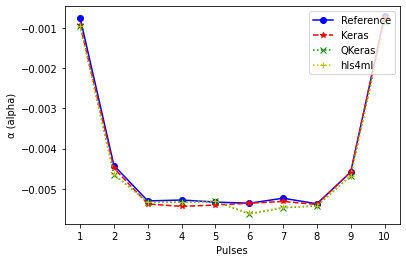

Test # 48


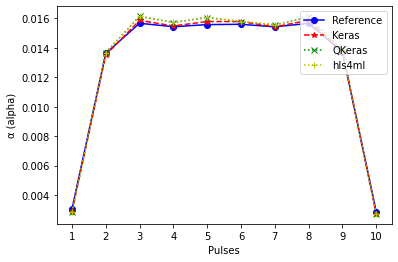

Test # 49


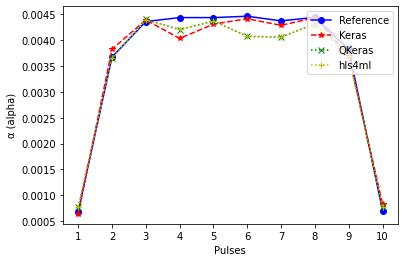

Test # 50


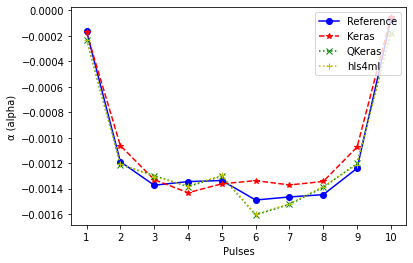

Test # 51


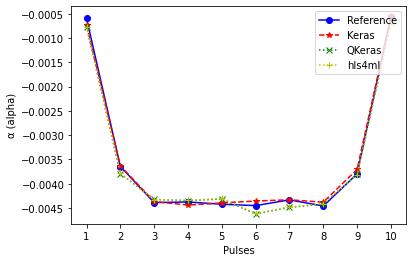

Test # 52


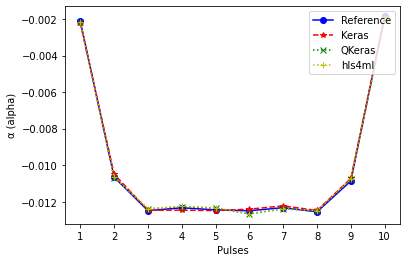

Test # 53


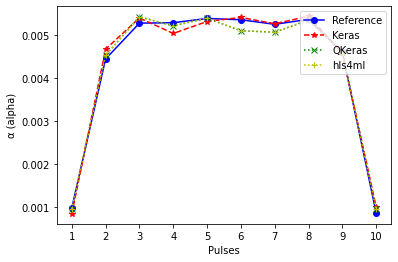

Test # 54


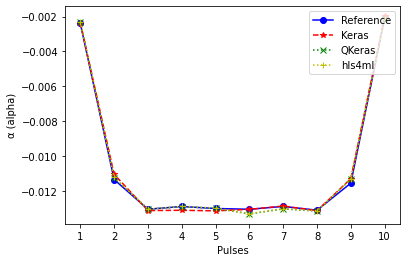

Test # 55


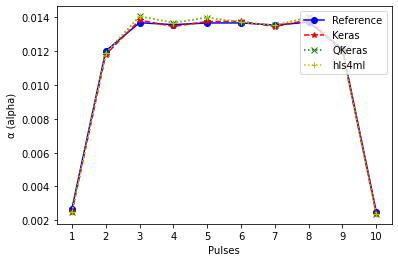

Test # 56


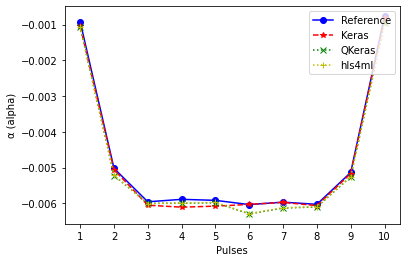

Test # 57


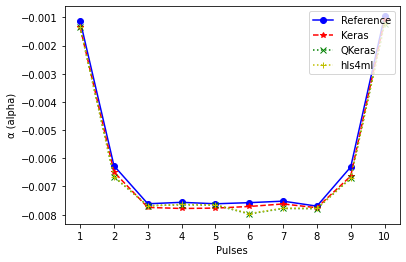

Test # 58


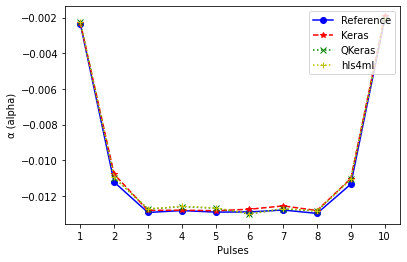

Test # 59


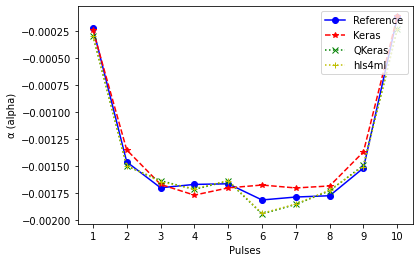

Test # 60


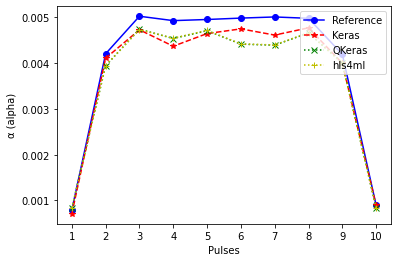

Test # 61


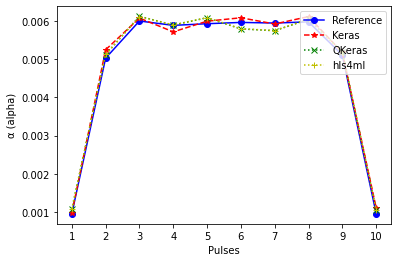

Test # 62


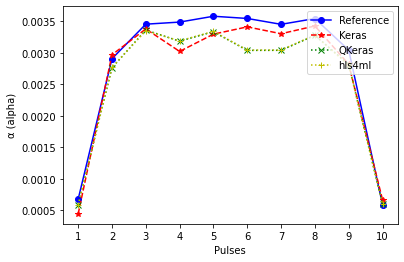

Test # 63


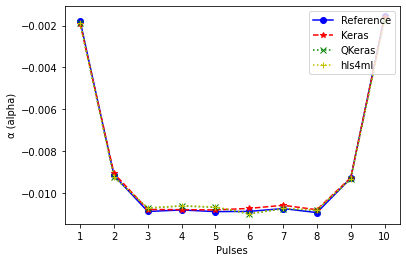

Test # 64


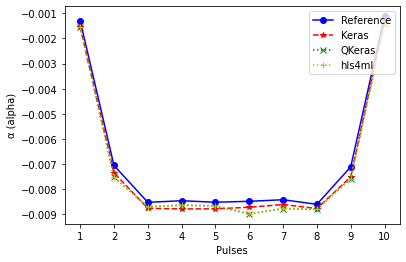

Test # 65


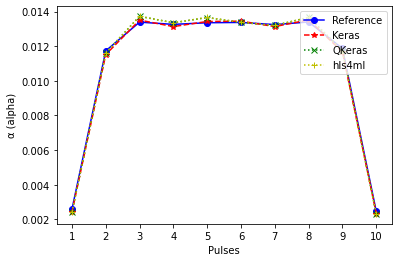

Test # 66


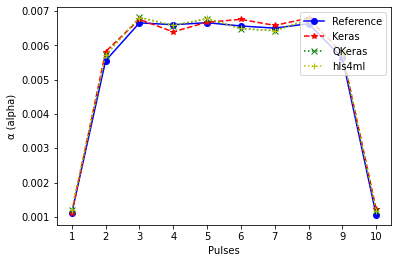

Test # 67


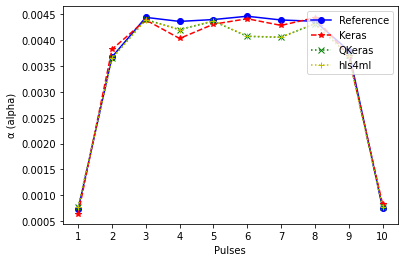

Test # 68


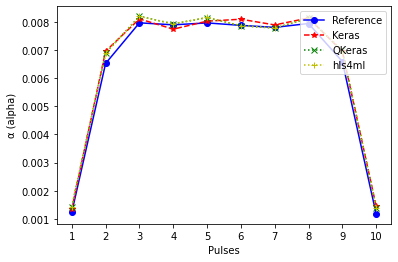

Test # 69


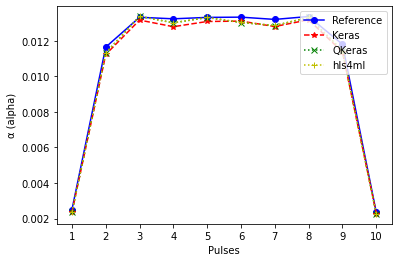

Test # 70


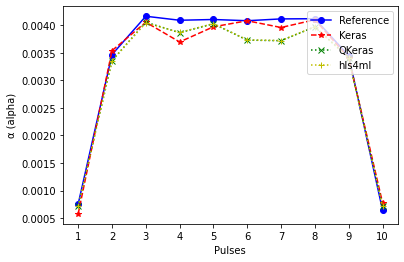

Test # 71


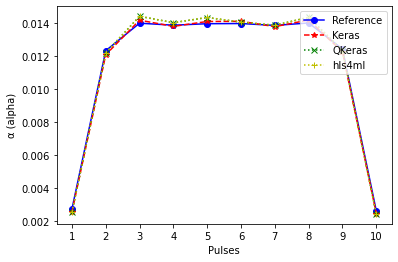

Test # 72


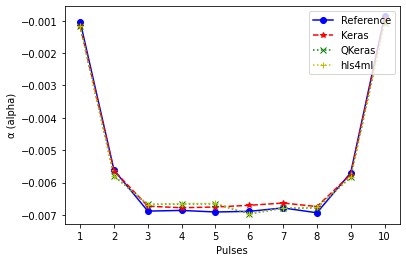

Test # 73


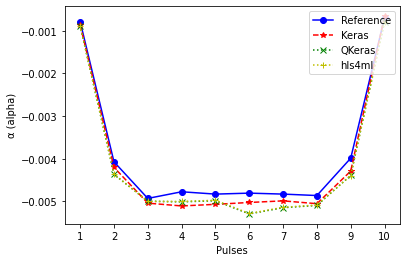

Test # 74


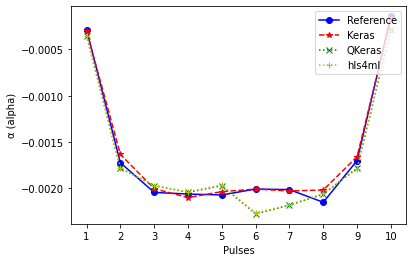

Test # 75


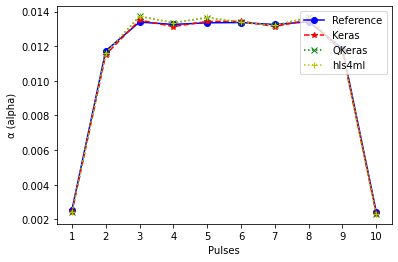

Test # 76


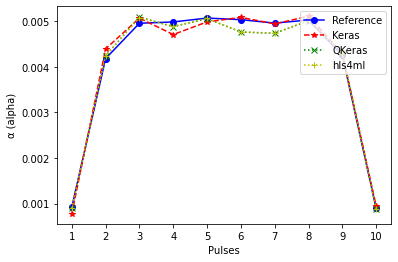

Test # 77


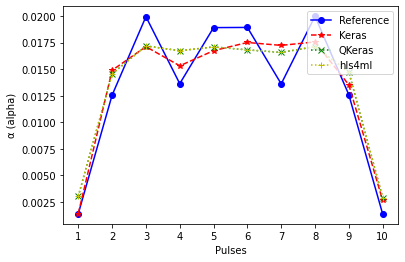

Test # 78


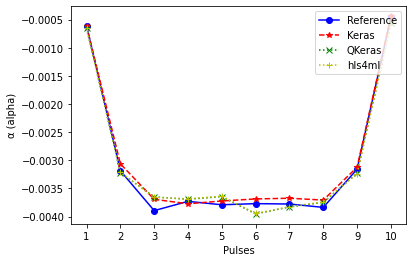

Test # 79


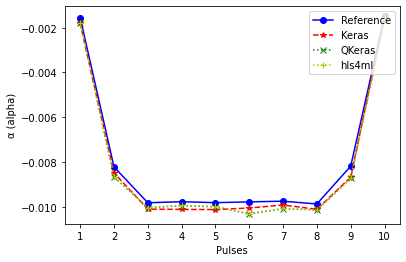

Test # 80


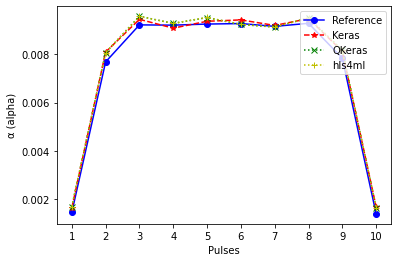

Test # 81


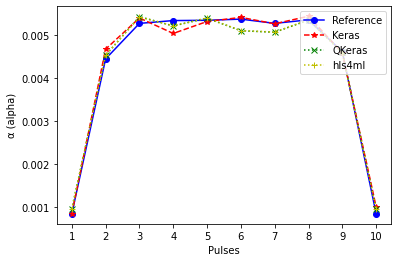

Test # 82


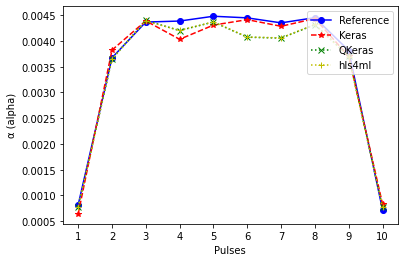

Test # 83


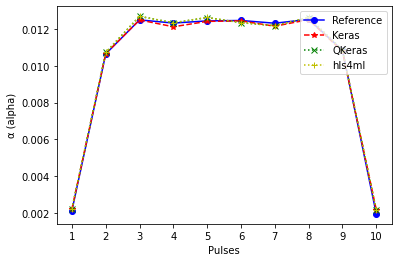

Test # 84


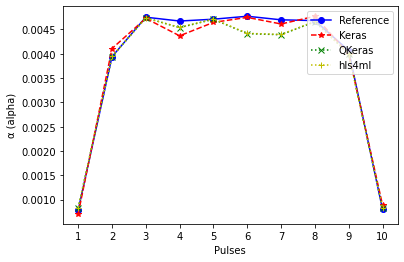

Test # 85


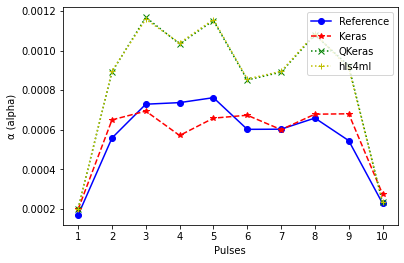

Test # 86


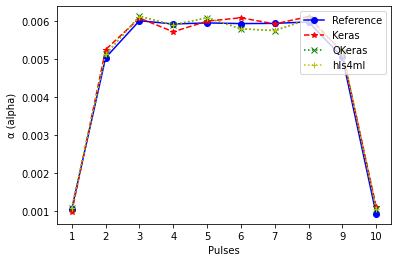

Test # 87


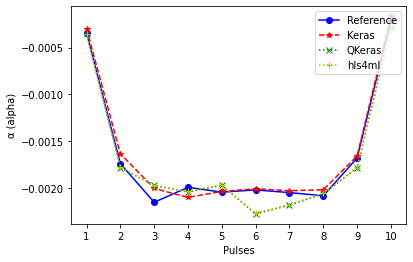

Test # 88


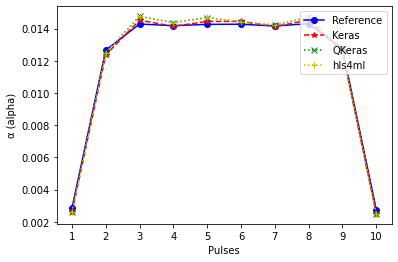

Test # 89


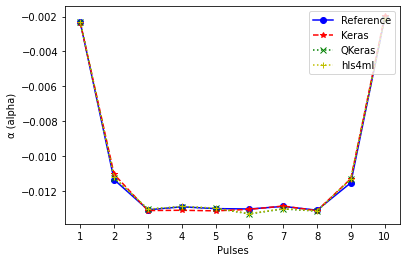

Test # 90


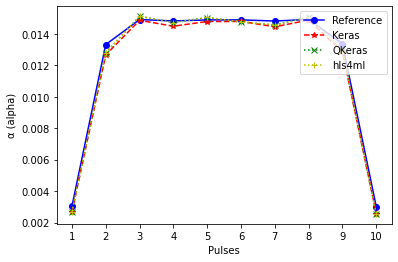

Test # 91


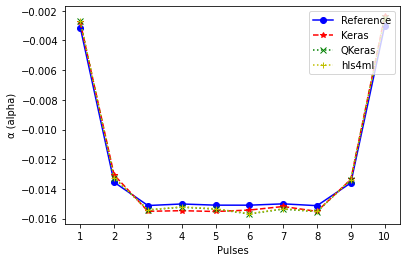

Test # 92


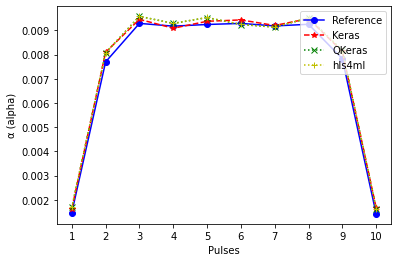

Test # 93


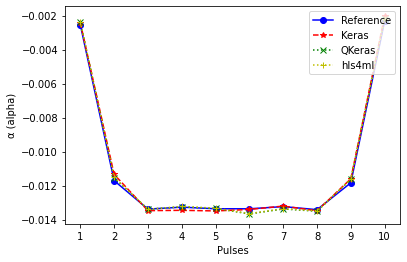

Test # 94


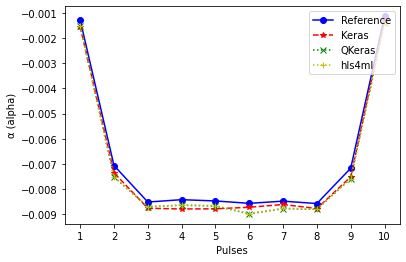

Test # 95


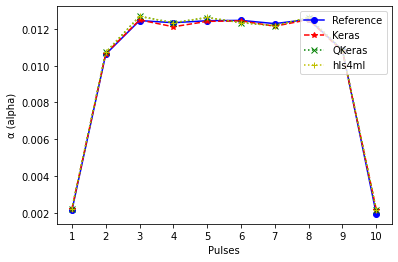

Test # 96


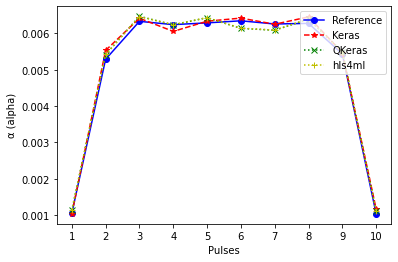

Test # 97


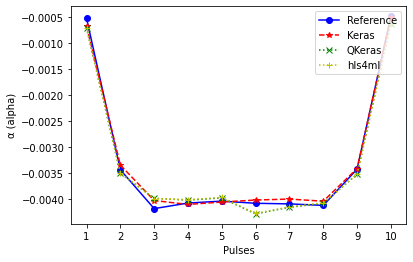

Test # 98


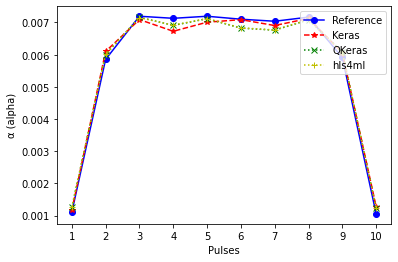

Test # 99


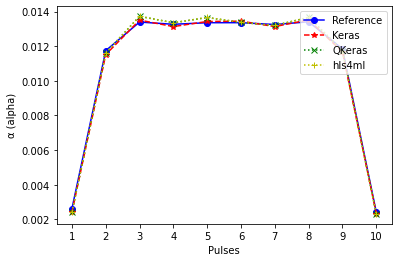

Test # 100


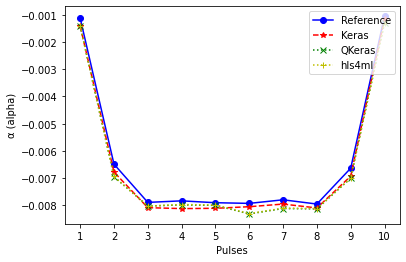

Test # 101


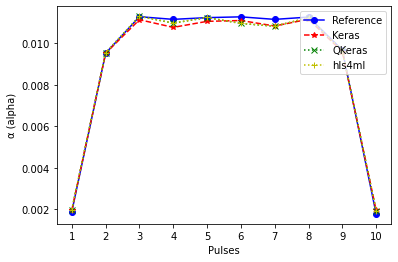

Test # 102


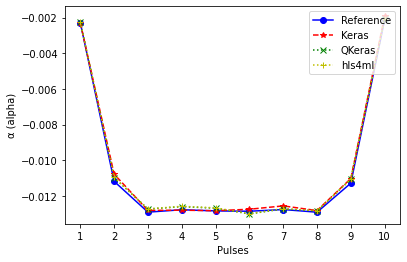

Test # 103


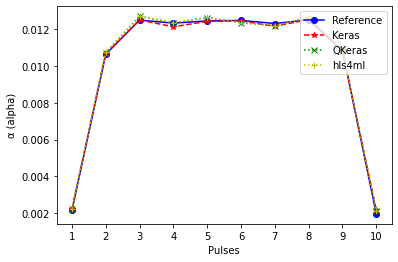

Test # 104


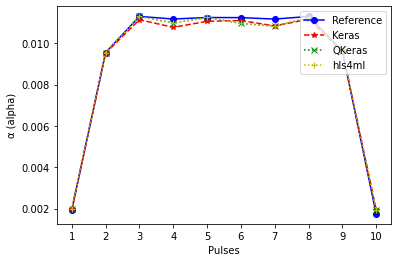

Test # 105


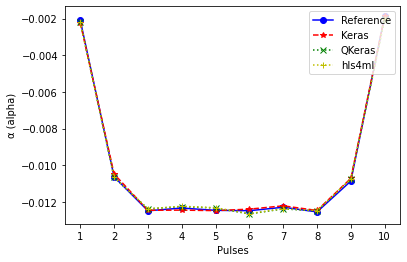

Test # 106


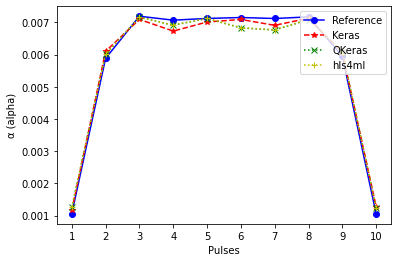

Test # 107


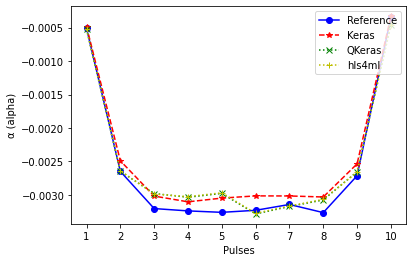

Test # 108


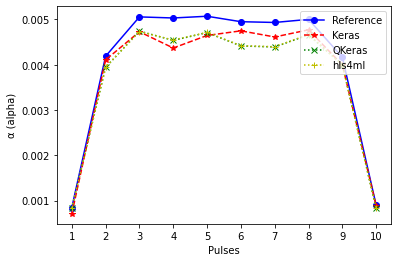

Test # 109


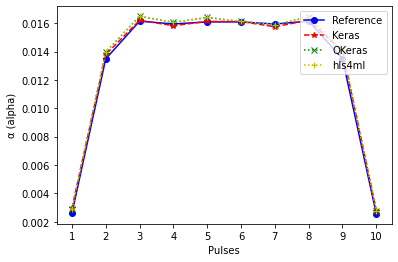

Test # 110


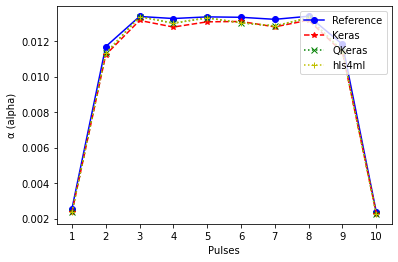

Test # 111


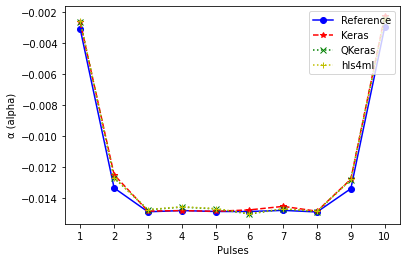

Test # 112


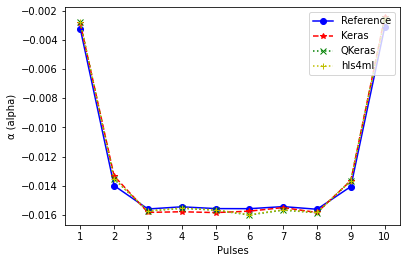

Test # 113


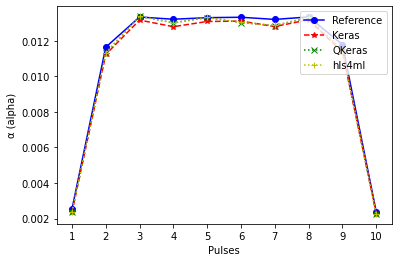

Test # 114


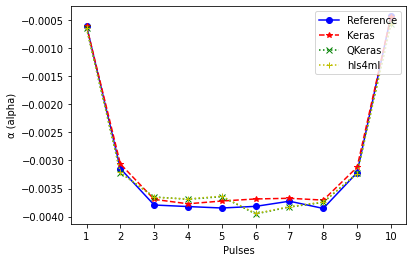

Test # 115


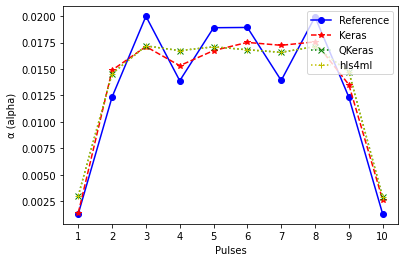

Test # 116


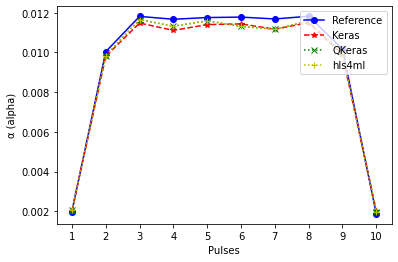

Test # 117


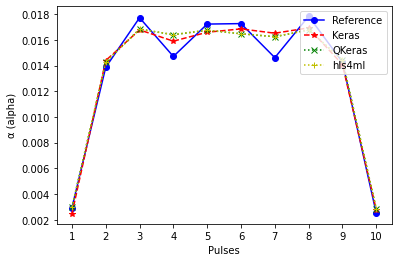

Test # 118


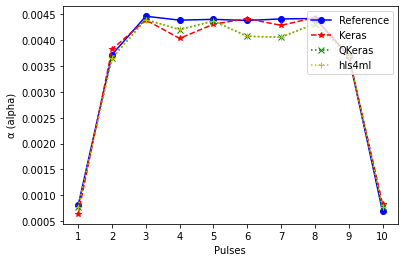

In [158]:
x = np.arange(1, Y_fs_test.shape[1]+1, 1)
for i in range(Y_fs_test.shape[0]):
    print('Test #', i)
    plt.clf()
    #plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(x, Y_fs_test.to_numpy()[i], marker='o', linestyle='-', color='b') 
    plt.plot(x, Y_keras[i], marker='*', linestyle='--', color='r')
    plt.plot(x, Y_qkeras[i], marker='x', linestyle=':', color='g')
    plt.plot(x, Y_hls4ml[i], marker='+', linestyle=':', color='y')
    plt.xticks(x, x)
    plt.legend(['Reference', 'Keras', 'QKeras','hls4ml'], loc='upper right')
    plt.ylabel('α (alpha)')
    plt.xlabel('Pulses')
    plt.show()

#### Hardware

In [159]:
%%time
results = hmodel.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.1 (64-bit)
  **** SW Build 2552052 on Fri May 24 14:47:09 MDT 2019
  **** IP Build 2548770 on Fri May 24 18:01:18 MDT 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'giuseppe' on host 'sam' (Linux_x86_64 version 5.4.0-122-generic) on Sun Aug 07 18:49:47 PDT 2022
INFO: [HLS 200-10] On os Ubuntu 18.04.2 LTS (beaver-osp1-ygritte X40)
INFO: [HLS 200-10] In directory '/home/giuseppe/research/projects/quantum/ml4quantum-release/model/appendix/fs_forward_problem/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/giuseppe/research/projects/quantum/ml4quantum-release/model/appendix/fs_forward_problem/hls4ml_prj/myproject_prj'

INFO: [HLS 200-111] Finished Checking Synthesizability Time (s): cpu = 00:00:23 ; elapsed = 00:00:24 . Memory (MB): peak = 898.133 ; gain = 196.852 ; free physical = 2149 ; free virtual = 73105
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::dense_latency<ap_ufixed<22, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, config11>' (firmware/nnet_utils/nnet_dense_latency.h:39:55).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::relu<ap_fixed<32, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<22, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config10>' (firmware/nnet_utils/nnet_activation.h:66:39).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::dense_latency<ap_ufixed<22, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config8>' (firmware/nnet_utils/nnet_dense_latency.h:39:55).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function '

INFO: [XFORM 203-131] Reshaping array 'fc1_input.V' (firmware/myproject.cpp:25) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer11_out.V' (firmware/myproject.cpp:26) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer2_out.V' (firmware/myproject.cpp:57) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer4_out.V' (firmware/myproject.cpp:61) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer5_out.V' (firmware/myproject.cpp:65) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer7_out.V' (firmware/myproject.cpp:69) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer8_out.V' (firmware/myproject.cpp:73) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer10_out.V' (firmware/myproject.cpp:77) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b2.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning arr

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<20, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<22, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:48:1) to 'nnet::dense_latency<ap_fixed<20, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<22, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0' by setting 'biases[2].V' to 'b2.V.2'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<20, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<22, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:48:1) to 'nnet::dense_latency<ap_fixed<20, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<22, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0' by setting 'biases[3].V' to 'b2.V.3'.
INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation.h:64:18) to (firmware/nnet_utils/nnet_activation.h:74:1) in function 'nnet::relu<ap_fixed<3

INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.09 seconds; current allocated memory: 331.982 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'relu_ap_fixed_ap_ufixed_22_4_5_3_0_relu_config7_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'relu<ap_fixed,ap_ufixed<22,4,5,3,0>,relu_config7>'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 1.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.13 seconds; current allocated memory: 332.176 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micr

INFO: [HLS 200-111] Finished generating all RTL models Time (s): cpu = 00:00:31 ; elapsed = 00:00:34 . Memory (MB): peak = 1021.281 ; gain = 320.000 ; free physical = 1377 ; free virtual = 72363
INFO: [VHDL 208-304] Generating VHDL RTL for myproject.
INFO: [VLOG 209-307] Generating Verilog RTL for myproject.
***** C/RTL SYNTHESIS COMPLETED IN 0h0m32s *****
INFO: [HLS 200-112] Total elapsed time: 33.65 seconds; peak allocated memory: 360.846 MB.
INFO: [Common 17-206] Exiting vivado_hls at Sun Aug  7 18:50:20 2022...
Vivado synthesis report not found.
Cosim report not found.
Timing report not found.
CPU times: user 56.8 ms, sys: 97.6 ms, total: 154 ms
Wall time: 35.8 s


In [160]:
print('-----------------------------------')
#print(results) # Print hashmap
hls_results=results['CSynthesisReport'] 
print("Estimated Clock Period: {} ns".format(hls_results['EstimatedClockPeriod']))
print("Best/Worst Latency:     {} / {}".format(hls_results['BestLatency'], hls_results['WorstLatency']))
print("Interval Min/Max:       {} / {}".format(hls_results['IntervalMin'], hls_results['IntervalMax']))
print("BRAM_18K:               {}, {:0.1f}% (Aval. {})".format(hls_results['BRAM_18K'], int(hls_results['BRAM_18K'])*100.0/int(hls_results['AvailableBRAM_18K']), hls_results['AvailableBRAM_18K']))
print("DSP48E:                 {}, {:0.1f}% (Aval. {})".format(hls_results['DSP48E'], int(hls_results['DSP48E'])*100.0/int(hls_results['AvailableDSP48E']), hls_results['AvailableDSP48E']))
print("FF:                     {}, {:0.1f}% (Aval. {})".format(hls_results['FF'], int(hls_results['FF'])*100.0/int(hls_results['AvailableFF']), hls_results['AvailableFF']))
print("LUT:                    {}, {:0.1f}% (Aval. {})".format(hls_results['LUT'], int(hls_results['LUT'])*100.0/int(hls_results['AvailableLUT']), hls_results['AvailableLUT']))
#print("URAM:                   {}, {} (Aval. {})".format(hls_results['URAM'], int(hls_results['URAM'])*100.0/int(hls_results['AvailableURAM']), hls_results['AvailableURAM']))
print('-----------------------------------')

-----------------------------------
Estimated Clock Period: 4.310 ns
Best/Worst Latency:     9 / 9
Interval Min/Max:       1 / 1
BRAM_18K:               0, 0.0% (Aval. 432)
DSP48E:                 154, 42.8% (Aval. 360)
FF:                     4839, 3.4% (Aval. 141120)
LUT:                    9355, 13.3% (Aval. 70560)
-----------------------------------


In [161]:
from metrics import write_hls_report

hls_report_file = prefix + 'fs_forward_problem_hls_report.csv'
write_hls_report(hls_report_file, hls_results)

In [162]:
from metrics import print_hls_report
print_hls_report(hls_report_file)

Date  EstimatedClockPeriod  BestLatency  WorstLatency  \
0  07/08/2022 13:20:26        4.262000000000            5             5   
1  07/08/2022 13:59:27        4.256000000000            7             7   
2  07/08/2022 14:30:17        4.337000000000           19            19   
3  07/08/2022 15:36:58        4.337000000000           16            16   
4  07/08/2022 17:24:18        4.362000000000            7             7   
5  07/08/2022 17:37:20        4.310000000000            9             9   
6  07/08/2022 18:50:21        4.310000000000            9             9   

   IntervalMin  IntervalMax  BRAM_18K  AvailableBRAM_18K  DSP48E  \
0            1            1         0                432     111   
1            1            1         0                432     154   
2            1            1         0                432    1092   
3            1            1         0                432    1072   
4            1            1         0                432     308   
5            1            1         0                432     154   
6            1            1         0                432     154   

   AvailableDSP48E     FF  AvailableFF    LUT  AvailableLUT  URAM  \
0              360   1540       141120   3708         70560     0   
1              360   2249       141120   7337         70560     0   
2              360  67529       141120  36397         70560     0   
3              360  65754       141120  35765         70560     0   
4              360   5964       141120   9502         70560     0   
5              360   4839       141120   9355         70560     0   
6              360   4839       141120   9355         70560     0   

   AvailableURAM  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0